###  Melbourne's House Price Prediction - Aim of the Project is to create multiple models to predict a house's price and determine which one is the best 

### Import the libraries to be used

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### To check information about our dataset

In [2]:
df = pd.read_csv('Melbourne_housing_FULL.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [3]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


#### We can see, a lot of attributes have missing data. It is possible that missing data are missing in different location. In the next step, we will remove all missing data and see what we're left with.

In [4]:
df2 = df[df.Price.notnull()]
df2 = df2[df2.BuildingArea.notnull()]
df2 = df2[df2.Car.notnull()]
df2 = df2[df2.Landsize.notnull()]
df2 = df2[df2.Lattitude.notnull()]
df2 = df2[df2.Longtitude.notnull()]
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9235 entries, 2 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         9235 non-null   object 
 1   Address        9235 non-null   object 
 2   Rooms          9235 non-null   int64  
 3   Type           9235 non-null   object 
 4   Price          9235 non-null   float64
 5   Method         9235 non-null   object 
 6   SellerG        9235 non-null   object 
 7   Date           9235 non-null   object 
 8   Distance       9235 non-null   float64
 9   Postcode       9235 non-null   float64
 10  Bedroom2       9235 non-null   float64
 11  Bathroom       9235 non-null   float64
 12  Car            9235 non-null   float64
 13  Landsize       9235 non-null   float64
 14  BuildingArea   9235 non-null   float64
 15  YearBuilt      8887 non-null   float64
 16  CouncilArea    9235 non-null   object 
 17  Lattitude      9235 non-null   float64
 18  Longtit

#### As we predicted it appears that the missing data are in different parts of the dataframe. The above statistic shows that the complete information is only 26% of it's original size. Let's work with what we have and see we can still gain insights. 

### Distribution of the data:

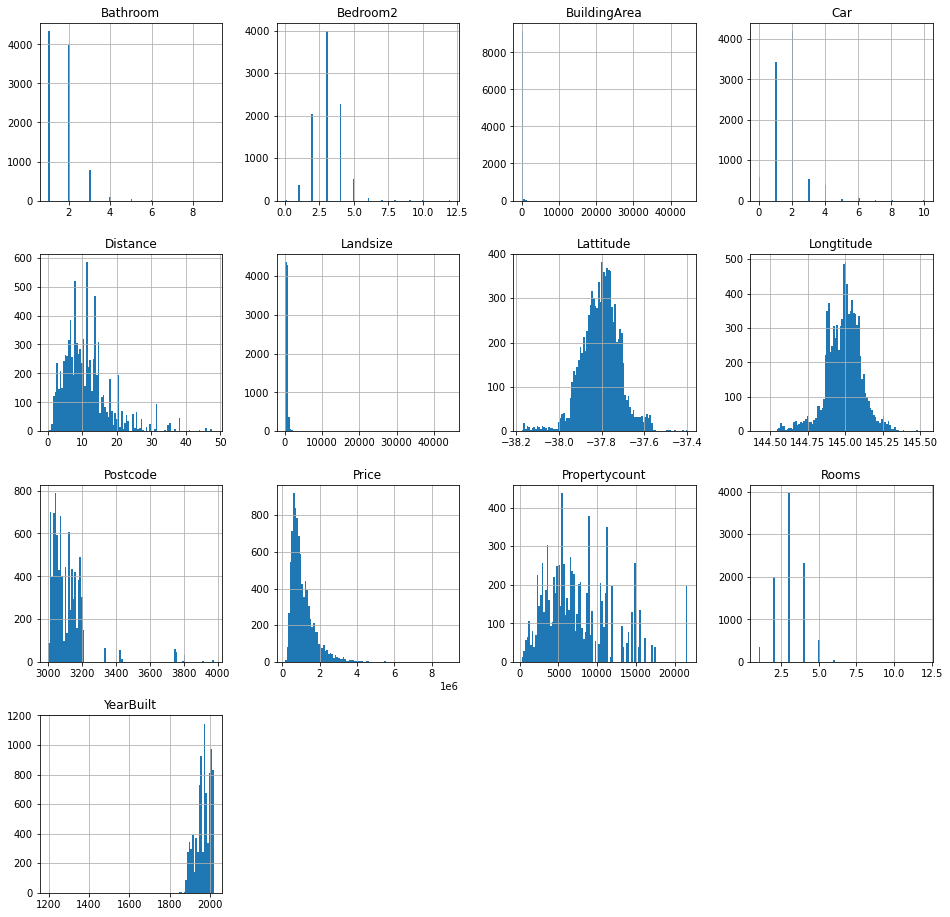

In [5]:
plt.rcParams['figure.figsize'] = 16, 16
df2.loc[:,:].hist(bins=100)
plt.show()

### Checking if number of bedrooms has a relationship to price. In real estate, this would be one of the important factors in price valuation.

In [6]:
print(pd.crosstab(df['Price'].mean(), df['Bedroom2']))
print('\n')

Bedroom2      0.0   1.0   2.0    3.0   4.0   5.0   6.0   7.0   8.0   9.0   \
row_0                                                                       
1.050173e+06    17   966  5777  11881  6348  1427   168    30    13     5   

Bedroom2      10.0  12.0  16.0  20.0  30.0  
row_0                                       
1.050173e+06     4     1     1     1     1  




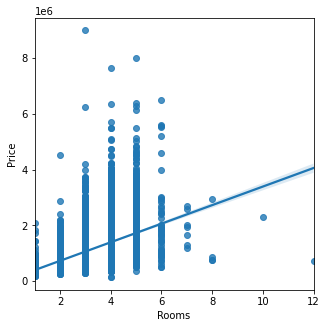

In [7]:
f, ax = plt.subplots(figsize=(5, 5))
sns.regplot(data=df2, x='Rooms', y='Price')
plt.show()

#### Although weak, it appears that there seems to be a positive relationship. Let's see what is the actual correlation between price and the other data points. We will look at this in 2 ways heatman for visualization and the correlation coefficient score.

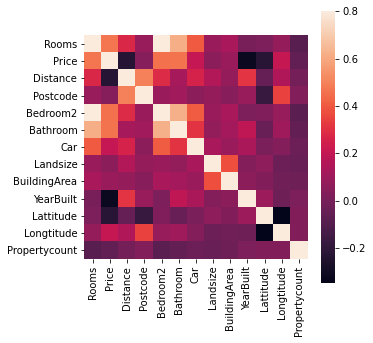

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Rooms,1.000000,0.472640,0.278520,0.089061,0.964431,0.620388,0.403254,0.096549,0.131938,0.006935,0.018126,0.083037,-0.080152
Price,0.472640,1.000000,-0.231005,0.040202,0.458355,0.461590,0.208669,0.052217,0.096421,-0.313664,-0.222984,0.211753,-0.059814
Distance,0.278520,-0.231005,1.000000,0.498362,0.285753,0.124917,0.261357,0.158037,0.080736,0.313383,-0.046503,0.154863,-0.005253
Postcode,0.089061,0.040202,0.498362,1.000000,0.092864,0.112656,0.060770,0.080142,0.044998,0.089913,-0.178072,0.349564,0.029601
Bedroom2,0.964431,0.458355,0.285753,0.092864,1.000000,0.622937,0.407151,0.096602,0.130304,0.016310,0.021735,0.083437,-0.077948
Bathroom,0.620388,0.461590,0.124917,0.112656,0.622937,1.000000,0.308242,0.074592,0.122403,0.192914,-0.040216,0.107519,-0.055485
Car,0.403254,0.208669,0.261357,0.060770,0.407151,0.308242,1.000000,0.128472,0.092447,0.139255,0.011223,0.034121,-0.032567
Landsize,0.096549,0.052217,0.158037,0.080142,0.096602,0.074592,0.128472,1.000000,0.377503,0.037753,0.061168,-0.030226,-0.040308
BuildingArea,0.131938,0.096421,0.080736,0.044998,0.130304,0.122403,0.092447,0.377503,1.000000,0.059936,0.028691,-0.013161,-0.027928
YearBuilt,0.006935,-0.313664,0.313383,0.089913,0.016310,0.192914,0.139255,0.037753,0.059936,1.000000,0.100030,-0.026886,0.017224


In [8]:
f, ax = plt.subplots(figsize=(5, 5))
corrmat = df2.corr()
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()
corrmat

#### Create new features to see if these new features will have a stronger correlation coefficient score than the original. We will do so by mixing the data and altering the data.

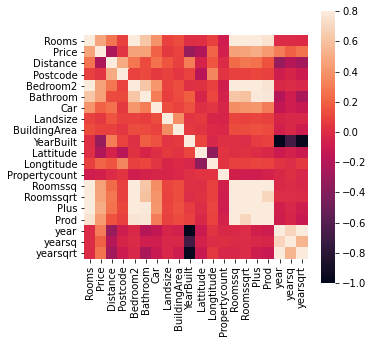

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,Roomssq,Roomssqrt,Plus,Prod,year,yearsq,yearsqrt
Rooms,1.000000,0.472640,0.278520,0.089061,0.964431,0.620388,0.403254,0.096549,0.131938,0.006935,0.018126,0.083037,-0.080152,0.966400,0.991617,0.963630,0.753215,-0.006935,-0.001592,-0.015029
Price,0.472640,1.000000,-0.231005,0.040202,0.458355,0.461590,0.208669,0.052217,0.096421,-0.313664,-0.222984,0.211753,-0.059814,0.454009,0.467310,0.506609,0.427753,0.313664,0.195644,0.268038
Distance,0.278520,-0.231005,1.000000,0.498362,0.285753,0.124917,0.261357,0.158037,0.080736,0.313383,-0.046503,0.154863,-0.005253,0.237768,0.291581,0.260933,0.149197,-0.313383,-0.196743,-0.265085
Postcode,0.089061,0.040202,0.498362,1.000000,0.092864,0.112656,0.060770,0.080142,0.044998,0.089913,-0.178072,0.349564,0.029601,0.086236,0.086742,0.105689,0.088274,-0.089913,-0.040282,-0.094531
Bedroom2,0.964431,0.458355,0.285753,0.092864,1.000000,0.622937,0.407151,0.096602,0.130304,0.016310,0.021735,0.083437,-0.077948,0.930790,0.957186,0.964423,0.762832,-0.016310,-0.006828,-0.023120
Bathroom,0.620388,0.461590,0.124917,0.112656,0.622937,1.000000,0.308242,0.074592,0.122403,0.192914,-0.040216,0.107519,-0.055485,0.622797,0.600349,0.790836,0.773291,-0.192914,-0.076303,-0.238847
Car,0.403254,0.208669,0.261357,0.060770,0.407151,0.308242,1.000000,0.128472,0.092447,0.139255,0.011223,0.034121,-0.032567,0.375337,0.405138,0.413126,0.310423,-0.139255,-0.078866,-0.113620
Landsize,0.096549,0.052217,0.158037,0.080142,0.096602,0.074592,0.128472,1.000000,0.377503,0.037753,0.061168,-0.030226,-0.040308,0.097721,0.092879,0.098799,0.082831,-0.037753,-0.025326,-0.027133
BuildingArea,0.131938,0.096421,0.080736,0.044998,0.130304,0.122403,0.092447,0.377503,1.000000,0.059936,0.028691,-0.013161,-0.027928,0.131070,0.127988,0.140433,0.122114,-0.059936,-0.017362,-0.086521
YearBuilt,0.006935,-0.313664,0.313383,0.089913,0.016310,0.192914,0.139255,0.037753,0.059936,1.000000,0.100030,-0.026886,0.017224,0.018170,-0.000812,0.066431,0.086334,-1.000000,-0.690345,-0.965364


In [9]:
df2['Roomssq'] = df2.Rooms ** 2
df2['Roomssqrt'] = df2.Rooms ** (1/2)
df2['Plus'] = df2.Rooms + df2.Bedroom2 + df2.Bathroom
df2['Prod'] = df2.Rooms * df2.Bedroom2 * df2.Bathroom
df2['year'] = (2017 - df2.YearBuilt)
df2['yearsq'] = (2017 - df2.YearBuilt) ** 2
df2['yearsqrt'] = (2017 - df2.YearBuilt) ** (1/2)

f, ax = plt.subplots(figsize=(5, 5))
corrmat = df2.corr()
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()
corrmat

#### In this step we can see that the column "Plus" has a correlation score of .506 which is the highest correlation score out of all the features new and old. This new feature was created by rooms, bedrooms and bathrooms.

In [10]:
#Drops the variables with weak correlation scores
X = df2.drop(['YearBuilt', 'year', 'yearsq', 'yearsqrt', 'Price',], axis=1)
Y = df2.Price
X = pd.get_dummies(data=X)

### First Model "Decision Tree Regressor"

In [11]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

dtr = DecisionTreeRegressor(max_features=10, max_depth=10)
dtr.fit(X, Y)
print(cross_val_score(dtr, X, Y, cv=5))

[-0.02758515 -0.00815281 -0.00674061 -0.01372417  0.02819629]


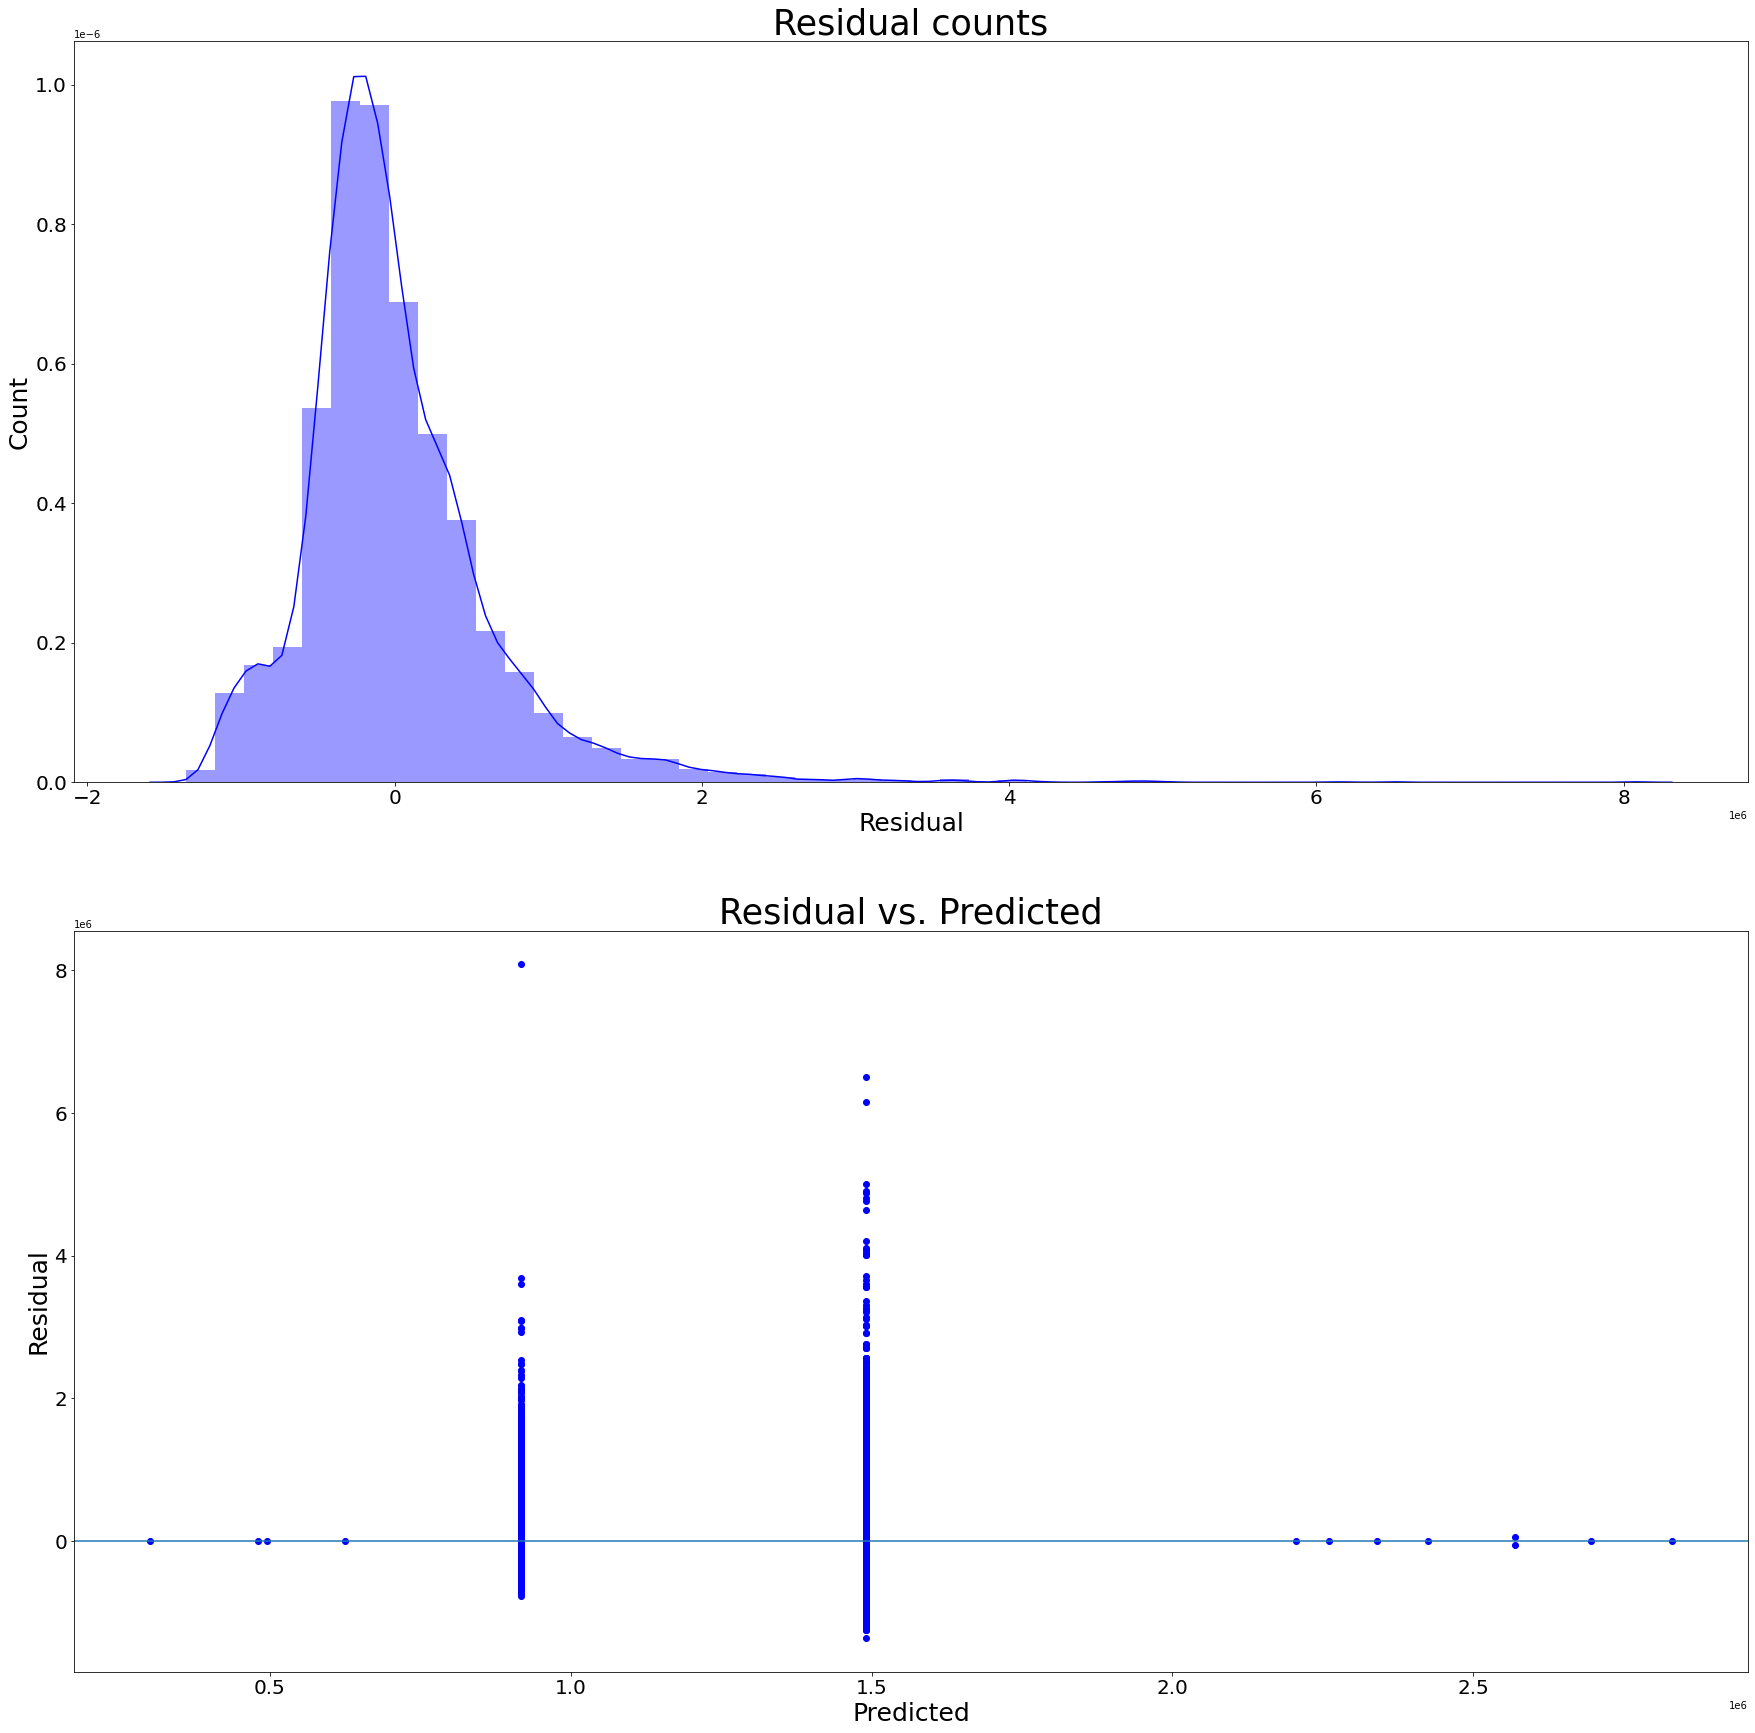

RMSE:
624930.106348593


In [12]:
predicted = dtr.predict(X)
residual = Y - predicted

fig = plt.figure(figsize=(30,30))
ax1 = plt.subplot(211)
sns.distplot(residual, color ='blue')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Residual counts',fontsize=35)
plt.xlabel('Residual',fontsize=25)
plt.ylabel('Count',fontsize=25)

ax2 = plt.subplot(212)
plt.scatter(predicted, residual, color ='blue')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('Predicted',fontsize=25)
plt.ylabel('Residual',fontsize=25)
plt.axhline(y=0)
plt.title('Residual vs. Predicted',fontsize=35)

plt.show()

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(Y, predicted))
print('RMSE:')
print(rmse)

#### The higher the RMSE the worst our predicting model is and the reason why the RMSE score is high and bad is because it appears this model picked a single price point for the categories that the model selected this is shown in the graphs above.

###  The next model "Nearest Neighbors" with 2 nearnest neighbors

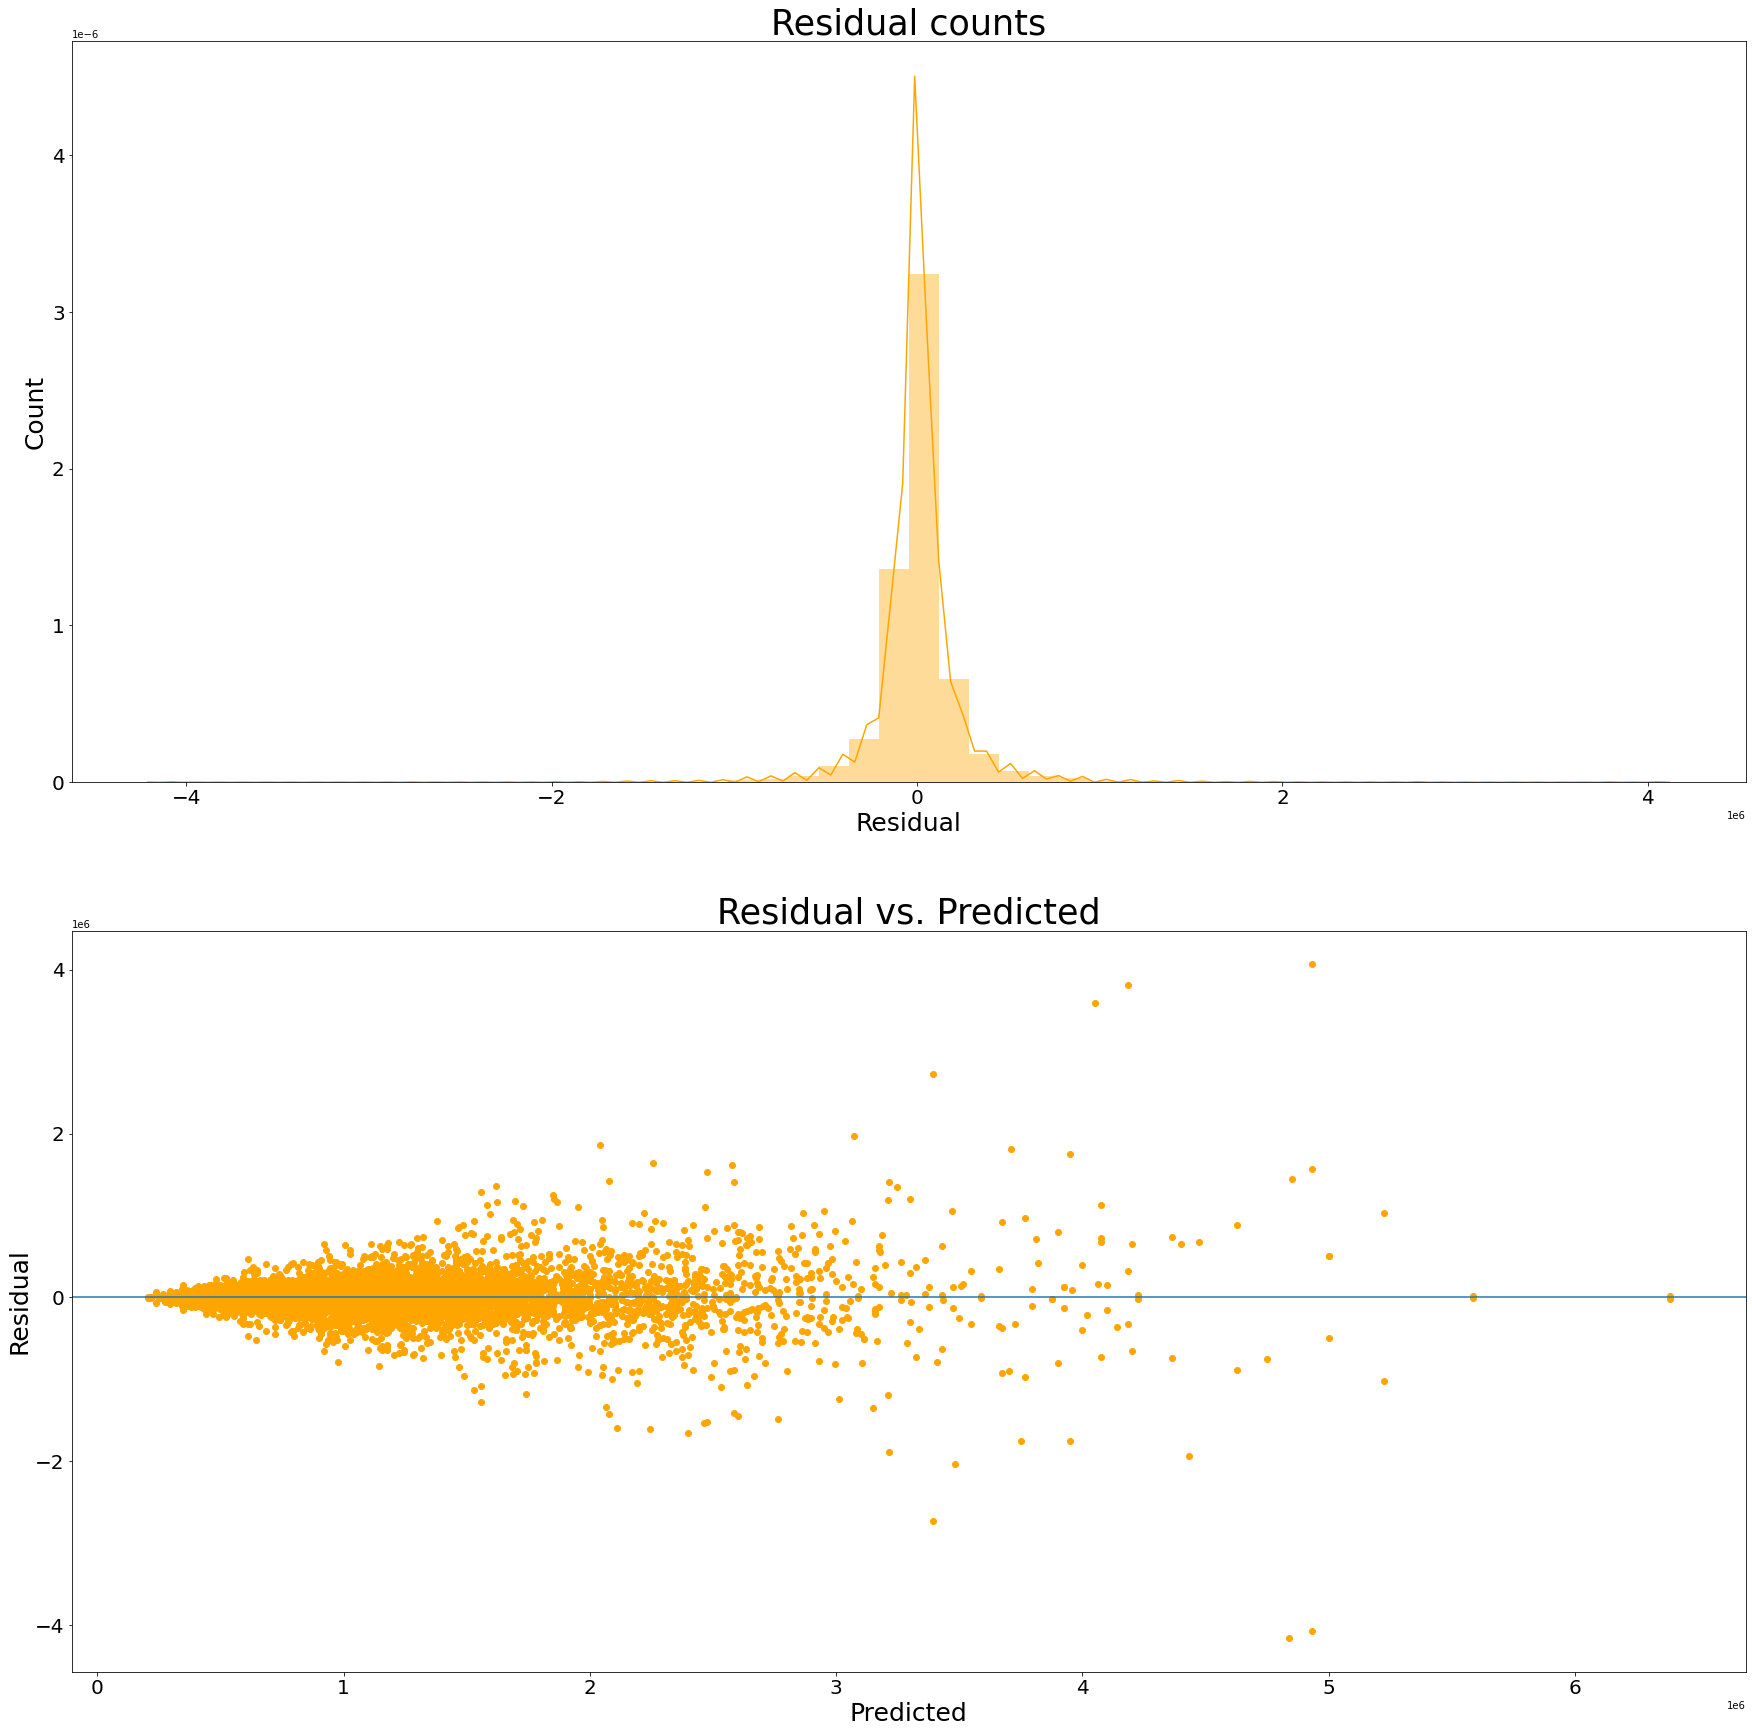

RMSE:
239796.06942904243


In [13]:
from sklearn import neighbors

knn = neighbors.KNeighborsRegressor(n_neighbors=2)
knn.fit(X, Y)

predicted = knn.predict(X)
residual = Y - predicted

fig = plt.figure(figsize=(30,30))
ax1 = plt.subplot(211)
sns.distplot(residual, color ='orange')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Residual counts',fontsize=35)
plt.xlabel('Residual',fontsize=25)
plt.ylabel('Count',fontsize=25)

ax2 = plt.subplot(212)
plt.scatter(predicted, residual, color ='orange')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('Predicted',fontsize=25)
plt.ylabel('Residual',fontsize=25)
plt.axhline(y=0)
plt.title('Residual vs. Predicted',fontsize=35)

plt.show()

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(Y, predicted))
print('RMSE:')
print(rmse)

#### Checking if n_neighbors = 2 is not the optimal number

In [14]:
rmse_l = []
num = []
for n in range(2, 16):
    knn = neighbors.KNeighborsRegressor(n_neighbors=n)
    knn.fit(X, Y)
    predicted = knn.predict(X)
    rmse_l.append(np.sqrt(mean_squared_error(Y, predicted)))
    num.append(n)

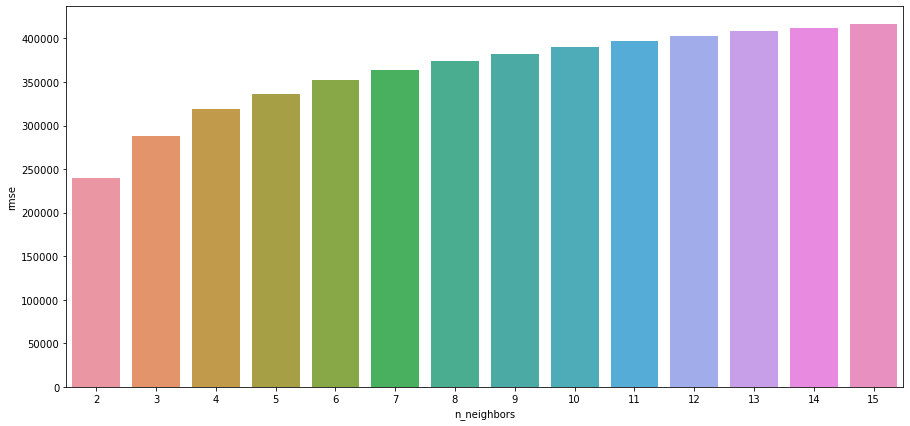

In [15]:
df_plt = pd.DataFrame()
df_plt['rmse'] = rmse_l
df_plt['n_neighbors'] = num
ax = plt.figure(figsize=(15,7))
sns.barplot(data = df_plt, x = 'n_neighbors', y = 'rmse')
plt.show()

In [16]:
print(rmse_l)

[239796.06942904243, 288092.9103888622, 318471.9161130535, 335688.5985668292, 351663.7346334434, 363957.61879377975, 374444.0696249453, 382350.7056089041, 389995.8315869301, 396720.31833091355, 402475.5238363821, 407944.21479445114, 412046.8890090364, 415942.87307960464]


#### It appears that 2 nearest neighbors is the optimal number of neighbors. This is evidenced by the increasing RMSE as we increase the number of neighbors.

### Third Model : Lasso is a regression analysis method that performs both variable selection and regularization in order to enhance the prediction accuracy and interpretability of the statistical model it produces.

C:\Users\61424\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 706921733714.2427, tolerance: 426708566968.6931
  model = cd_fast.enet_coordinate_descent(


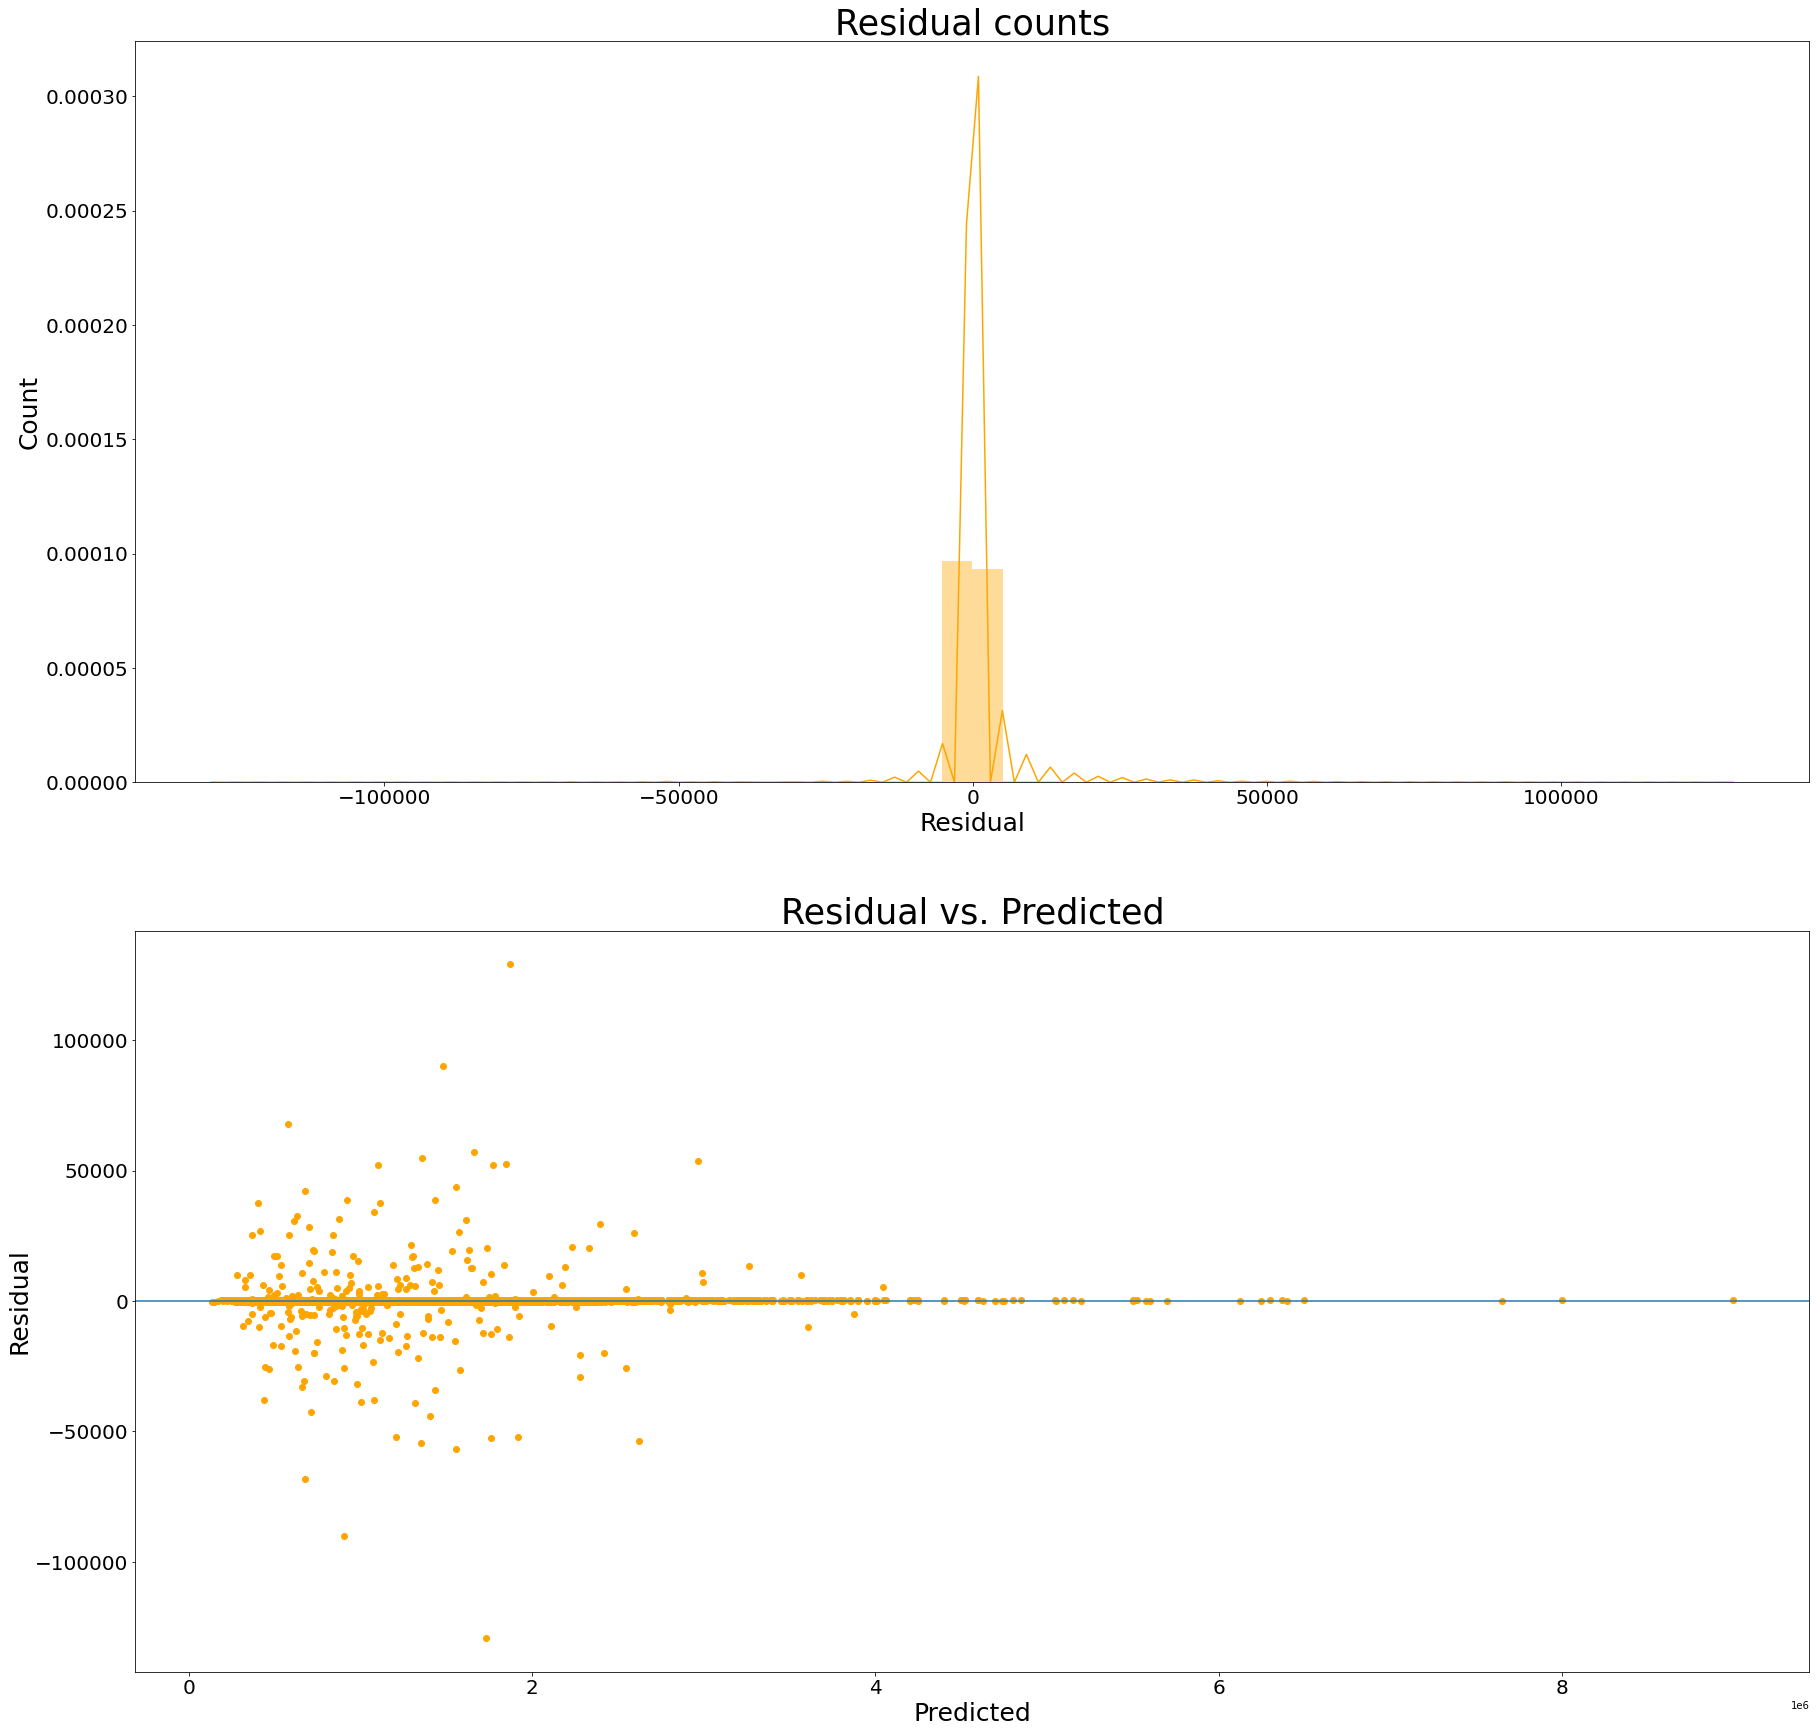

RMSE:
4093.9572896086947


In [17]:
from sklearn import linear_model
lass = linear_model.Lasso(alpha = .025)
lass.fit (X, Y)

predicted = lass.predict(X)
residual = Y - predicted

fig = plt.figure(figsize=(30,30))
ax1 = plt.subplot(211)
sns.distplot(residual, color ='orange')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Residual counts',fontsize=35)
plt.xlabel('Residual',fontsize=25)
plt.ylabel('Count',fontsize=25)

ax2 = plt.subplot(212)
plt.scatter(predicted, residual, color ='orange')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('Predicted',fontsize=25)
plt.ylabel('Residual',fontsize=25)
plt.axhline(y=0)
plt.title('Residual vs. Predicted',fontsize=35)

plt.show()

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(Y, predicted))
print('RMSE:')
print(rmse)

In [18]:
alp = .1
for n in range (0,3):
    lass = linear_model.Lasso(alpha = alp)
    lass.fit (X, Y)
    predicted = lass.predict(X)
    rmse = np.sqrt(mean_squared_error(Y, predicted))
    alp = alp + .1
    print('RMSE:')
    print(rmse)

C:\Users\61424\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2358579788789.1294, tolerance: 426708566968.6931
  model = cd_fast.enet_coordinate_descent(


RMSE:
6407.077976492777


C:\Users\61424\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4392773721360.9937, tolerance: 426708566968.6931
  model = cd_fast.enet_coordinate_descent(


RMSE:
8603.005623382129


C:\Users\61424\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6358815505944.615, tolerance: 426708566968.6931
  model = cd_fast.enet_coordinate_descent(


RMSE:
10239.618367002227


### Ridge Regression

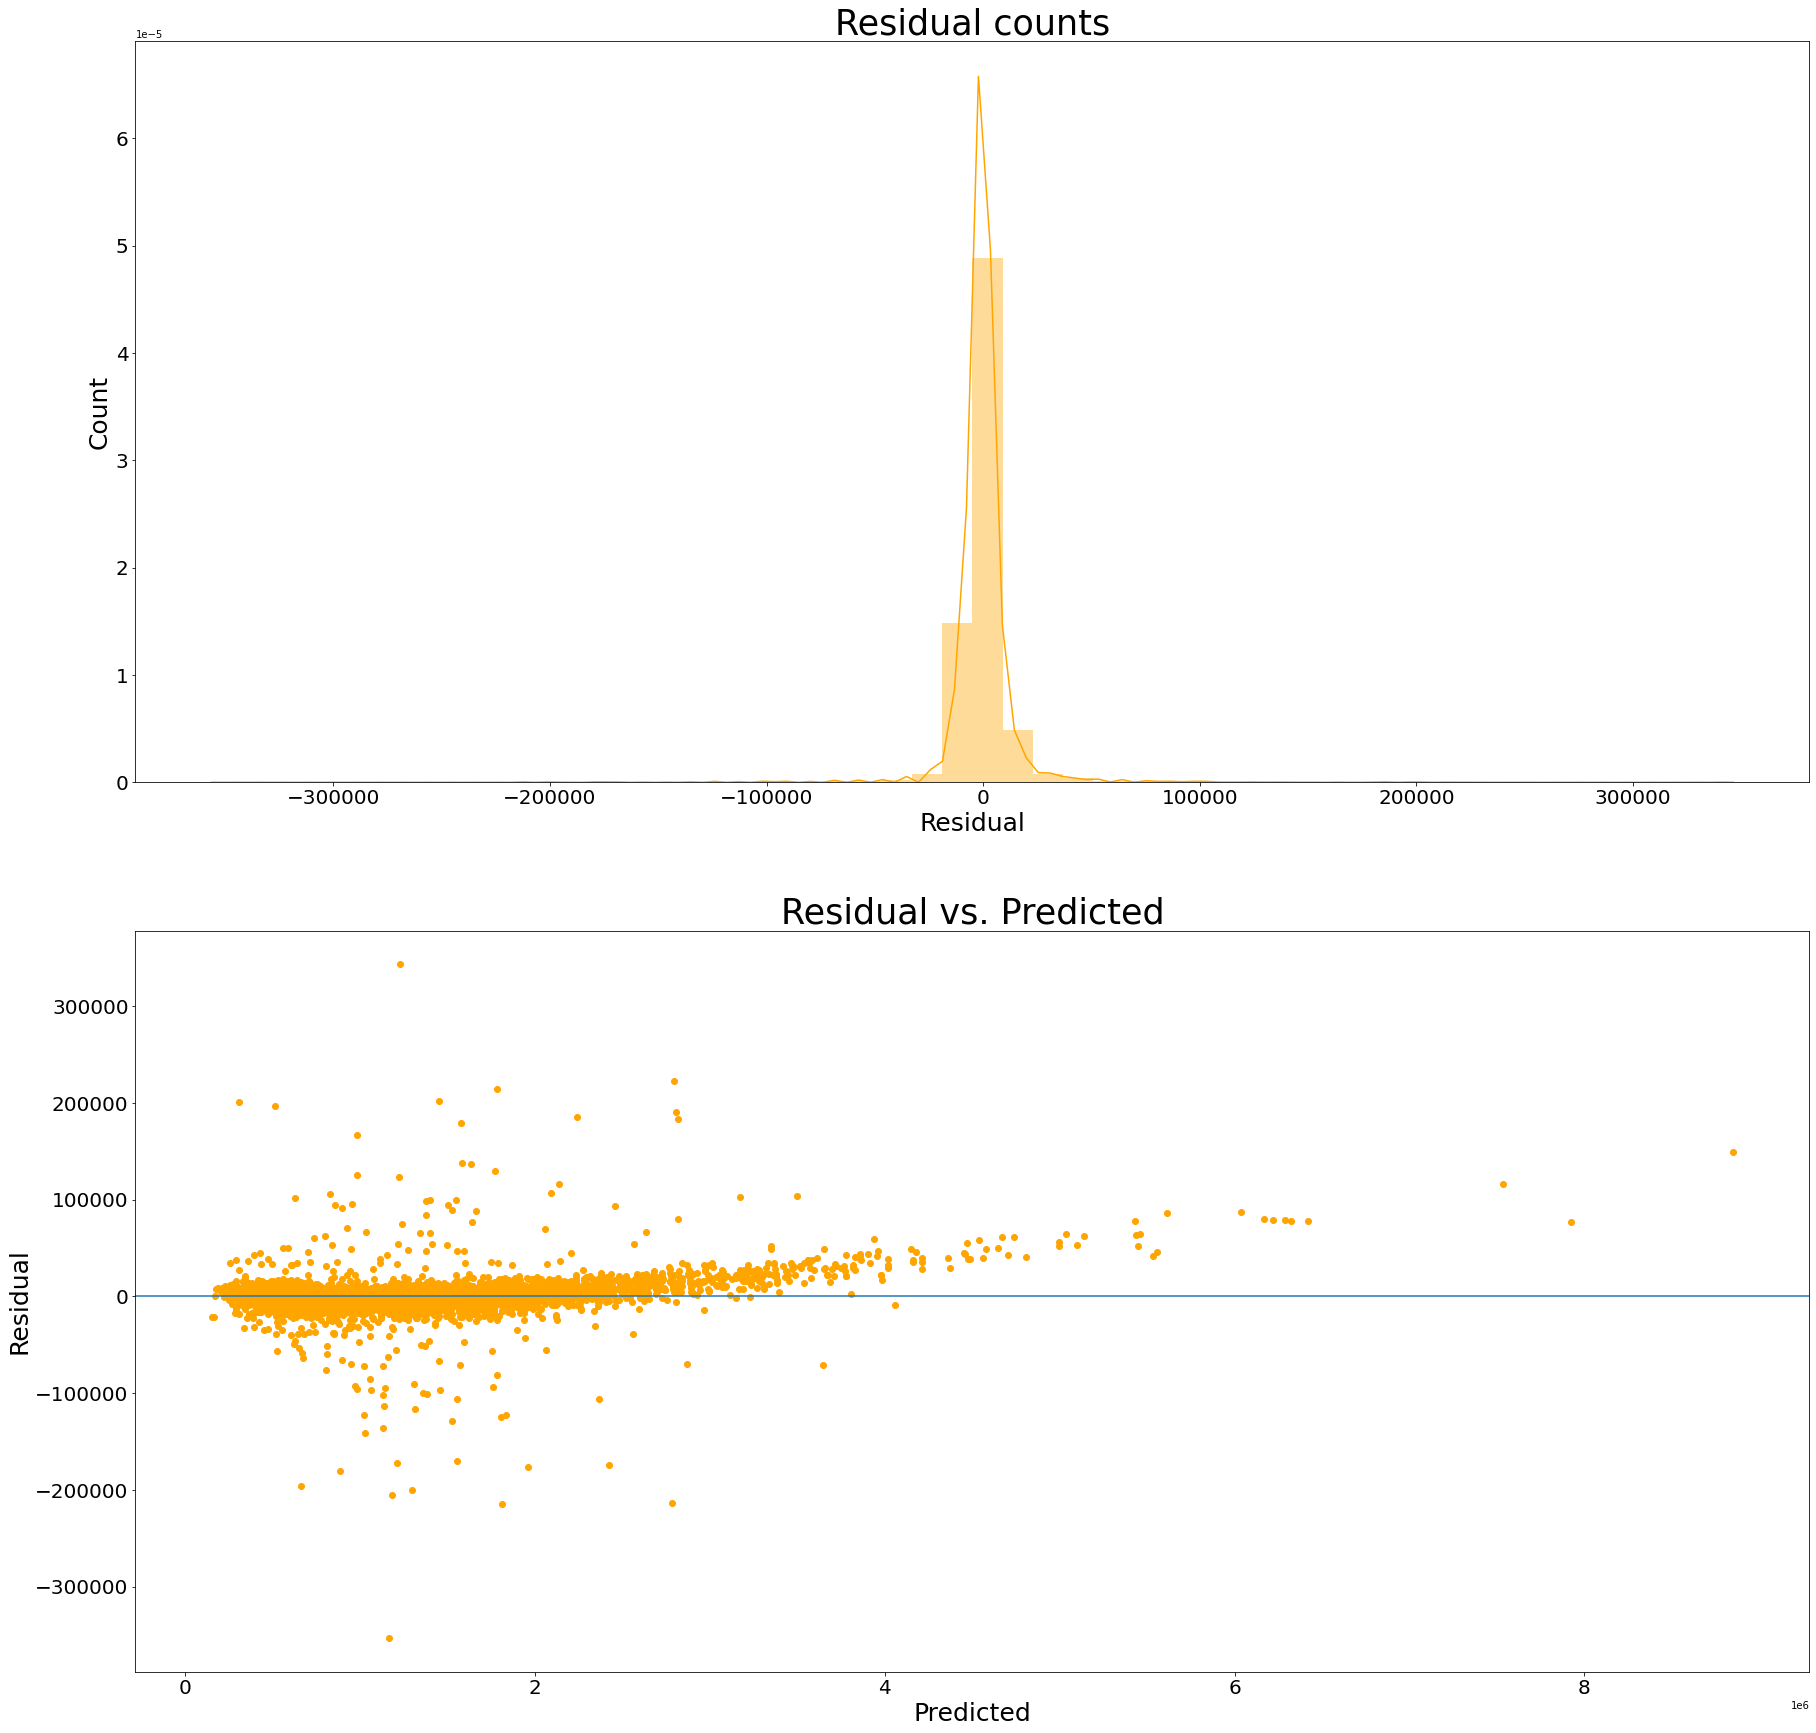

RMSE:
16249.254989569474


In [19]:
rid = linear_model.Ridge(alpha = .025)
rid.fit (X, Y)

predicted = rid.predict(X)
residual = Y - predicted

fig = plt.figure(figsize=(30,30))
ax1 = plt.subplot(211)
sns.distplot(residual, color ='orange')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Residual counts',fontsize=35)
plt.xlabel('Residual',fontsize=25)
plt.ylabel('Count',fontsize=25)

ax2 = plt.subplot(212)
plt.scatter(predicted, residual, color ='orange')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('Predicted',fontsize=25)
plt.ylabel('Residual',fontsize=25)
plt.axhline(y=0)
plt.title('Residual vs. Predicted',fontsize=35)

plt.show()

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(Y, predicted))
print('RMSE:')
print(rmse)

In [20]:
lass = linear_model.Lasso(alpha = .025)
lass.fit (X, Y)

print('\nR² for the model with many features:')
print(lass.score(X, Y))
origparams = np.append(lass.coef_, lass.intercept_)
print('\nParameter features:')
print(origparams)

print('\nCross Validation Score:')
print(cross_val_score(lass, X, Y, cv=3))

C:\Users\61424\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 706921733714.2427, tolerance: 426708566968.6931
  model = cd_fast.enet_coordinate_descent(



R² for the model with many features:
0.9999637262752937

Parameter features:
[ 2.41960452e+05 -3.19852924e+04  9.96975806e+02 ... -5.86148041e+03
  3.24574308e+04 -1.26740605e+08]

Cross Validation Score:


C:\Users\61424\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 295755389318.95575, tolerance: 281491124345.49915
  model = cd_fast.enet_coordinate_descent(


[0.53215977 0.49897442 0.42384421]


In [21]:
print('\nR² for the model with many features:')
print(rid.score(X, Y))
origparams_rid = np.append(rid.coef_, rid.intercept_)
print('\nParameter features:')
print(origparams_rid)

print('\nCross Validation Score:')
print(cross_val_score(rid, X, Y, cv=3))


R² for the model with many features:
0.9994285576208652

Parameter features:
[ 3.95564208e+05 -2.72098642e+04  9.65615556e+01 ... -2.14619863e+05
 -3.28357765e+04  2.91121231e+04]

Cross Validation Score:
[0.65786158 0.62432385 0.42912289]


In [22]:
knn = neighbors.KNeighborsRegressor(n_neighbors=2)
knn.fit(X, Y)
print('\nR² for the model with many features:')
print(knn.score(X, Y))

print(cross_val_score(knn, X, Y, cv=3))


R² for the model with many features:
0.8755515024224427
[0.57166996 0.36048265 0.46380147]


#### Lasso & Ridge Summary:

#### It appears that a low alpha created a low RMSE score however when we crossvalidated the scores it appears that the model is overfitting, and this is evidenced by the graph with alot of the prices really tight along the line of zero.

#### Working with more data:
#### Since working with a reduced amount of data may skew our models predicting ability let's attempt to keep as much of the data as possible.

In [23]:
df3 = df[df.Price.notnull()]
df3 = df3[df3.Car.notnull()]
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20423 entries, 1 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         20423 non-null  object 
 1   Address        20423 non-null  object 
 2   Rooms          20423 non-null  int64  
 3   Type           20423 non-null  object 
 4   Price          20423 non-null  float64
 5   Method         20423 non-null  object 
 6   SellerG        20423 non-null  object 
 7   Date           20423 non-null  object 
 8   Distance       20423 non-null  float64
 9   Postcode       20423 non-null  float64
 10  Bedroom2       20423 non-null  float64
 11  Bathroom       20423 non-null  float64
 12  Car            20423 non-null  float64
 13  Landsize       17701 non-null  float64
 14  BuildingArea   10479 non-null  float64
 15  YearBuilt      11888 non-null  float64
 16  CouncilArea    20423 non-null  object 
 17  Lattitude      20401 non-null  float64
 18  Longti

In [24]:
df3 = df3.drop(['BuildingArea', 'YearBuilt', 'Landsize', 'Lattitude', 'Longtitude'], axis=1)
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20423 entries, 1 to 34856
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         20423 non-null  object 
 1   Address        20423 non-null  object 
 2   Rooms          20423 non-null  int64  
 3   Type           20423 non-null  object 
 4   Price          20423 non-null  float64
 5   Method         20423 non-null  object 
 6   SellerG        20423 non-null  object 
 7   Date           20423 non-null  object 
 8   Distance       20423 non-null  float64
 9   Postcode       20423 non-null  float64
 10  Bedroom2       20423 non-null  float64
 11  Bathroom       20423 non-null  float64
 12  Car            20423 non-null  float64
 13  CouncilArea    20423 non-null  object 
 14  Regionname     20423 non-null  object 
 15  Propertycount  20423 non-null  float64
dtypes: float64(7), int64(1), object(8)
memory usage: 2.6+ MB


#### Alright we kept about 58.5% of the original data. Please note that features above that were dropped were due to low correlation coefficient scores.

#### Let's take feature engineering to a new level:
#### Lets create markers of min, mean and max price of:

#### Suburb, Type (of property), Method, Seller (Sales Agent), Council Area, Region Name
#### By creating these markers, we are hoping this will give the model a better idea that certain area, types, sales agent, etc.. will be a better indicator of price points.

In [25]:
temp = df3.groupby('Suburb').agg({'min', 'mean', 'max'})
temp2 = temp['Price']
temp2 = temp2.reset_index()
temp2.columns = ['Suburb', 'max_sub_id', 'min_sub_id', 'mean_sub_id']
print(temp2.info())
temp2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Suburb       338 non-null    object 
 1   max_sub_id   338 non-null    float64
 2   min_sub_id   338 non-null    float64
 3   mean_sub_id  338 non-null    float64
dtypes: float64(3), object(1)
memory usage: 10.7+ KB
None


,Suburb,max_sub_id,min_sub_id,mean_sub_id
0,Abbotsford,1876000.0,300000.0,1.072066e+06
1,Aberfeldie,3900000.0,280000.0,1.354793e+06
2,Airport West,1250000.0,421000.0,7.805294e+05
3,Albanvale,655000.0,415000.0,5.360556e+05
4,Albert Park,4735000.0,442500.0,1.990072e+06


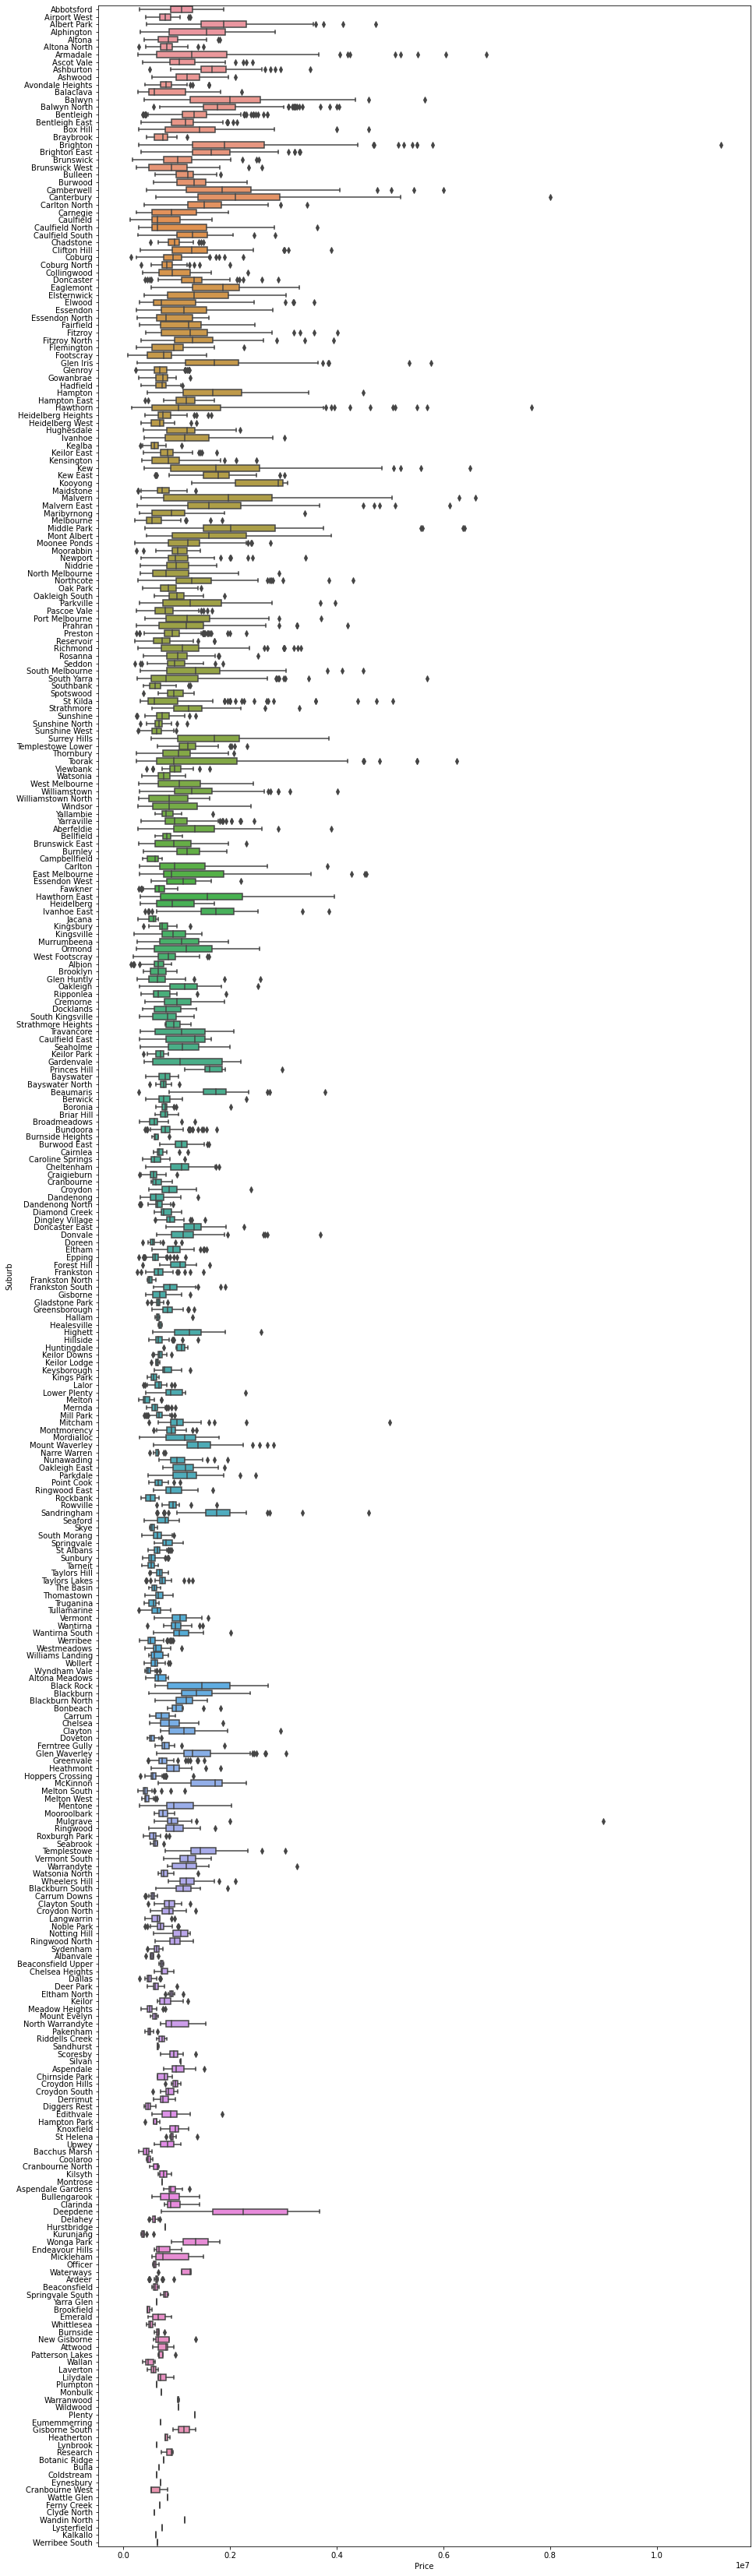

In [26]:
f, ax = plt.subplots(figsize=(15, 60))
sns.boxplot(data = df3, x='Price', y='Suburb')
plt.show()

In [27]:
df_copy = df3
df_copy = pd.merge(df_copy, temp2, on='Suburb', how='left')
df_copy.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,CouncilArea,Regionname,Propertycount,max_sub_id,min_sub_id,mean_sub_id
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,Yarra City Council,Northern Metropolitan,4019.0,1876000.0,300000.0,1.072066e+06
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,Yarra City Council,Northern Metropolitan,4019.0,1876000.0,300000.0,1.072066e+06
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,Yarra City Council,Northern Metropolitan,4019.0,1876000.0,300000.0,1.072066e+06
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,Yarra City Council,Northern Metropolitan,4019.0,1876000.0,300000.0,1.072066e+06
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,Yarra City Council,Northern Metropolitan,4019.0,1876000.0,300000.0,1.072066e+06


In [28]:
type_g = df3.groupby('Type').agg({'min', 'mean', 'max'})
temp3 = type_g['Price']
temp3 = temp3.reset_index()
temp3.columns = ['Type', 'max_t_id', 'min_t_id', 'mean_t_id']
temp3

,Type,max_t_id,min_t_id,mean_t_id
0,h,11200000.0,131000.0,1.210981e+06
1,t,3820000.0,300000.0,9.508400e+05
2,u,3625000.0,85000.0,6.079662e+05


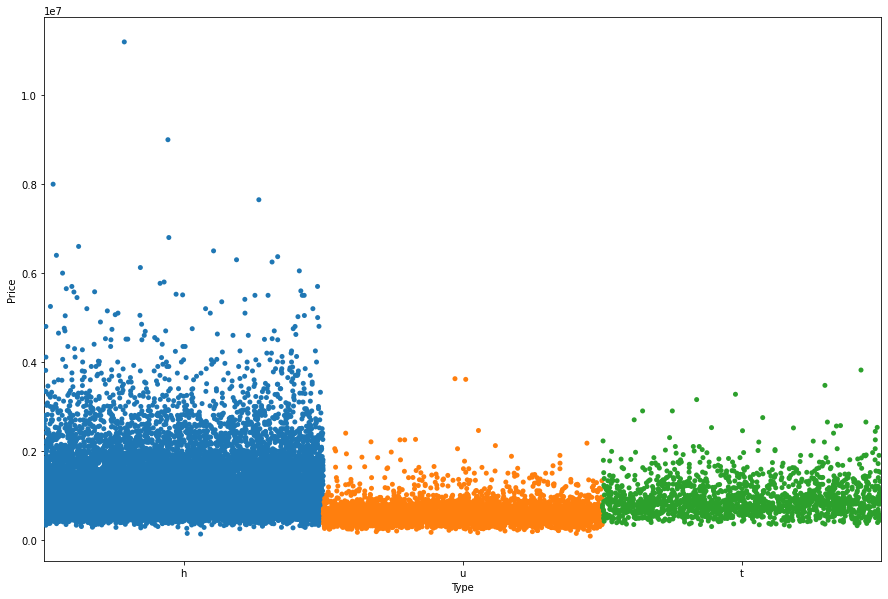

In [29]:
f, ax = plt.subplots(figsize=(15, 10))
sns.stripplot(data = df3, x='Type', y='Price', jitter=.5)
plt.show()

In [30]:
df_copy = pd.merge(df_copy, temp3, on='Type', how='left')
df_copy.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,CouncilArea,Regionname,Propertycount,max_sub_id,min_sub_id,mean_sub_id,max_t_id,min_t_id,mean_t_id
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,Yarra City Council,Northern Metropolitan,4019.0,1876000.0,300000.0,1.072066e+06,11200000.0,131000.0,1.210981e+06
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,0.0,Yarra City Council,Northern Metropolitan,4019.0,1876000.0,300000.0,1.072066e+06,11200000.0,131000.0,1.210981e+06
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,0.0,Yarra City Council,Northern Metropolitan,4019.0,1876000.0,300000.0,1.072066e+06,11200000.0,131000.0,1.210981e+06
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,1.0,Yarra City Council,Northern Metropolitan,4019.0,1876000.0,300000.0,1.072066e+06,11200000.0,131000.0,1.210981e+06
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,2.0,Yarra City Council,Northern Metropolitan,4019.0,1876000.0,300000.0,1.072066e+06,11200000.0,131000.0,1.210981e+06


In [31]:
method = df3.groupby('Method').agg({'min', 'mean', 'max'})
temp4 = method['Price']
temp4 = temp4.reset_index()
temp4.columns = ['Method', 'max_m_id', 'min_m_id', 'mean_m_id']
temp4

,Method,max_m_id,min_m_id,mean_m_id
0,PI,9000000.0,85000.0,1.169908e+06
1,S,7650000.0,185000.0,1.082119e+06
2,SA,3750000.0,240000.0,1.013634e+06
3,SP,6050000.0,190000.0,9.210242e+05
4,VB,11200000.0,160000.0,1.257424e+06


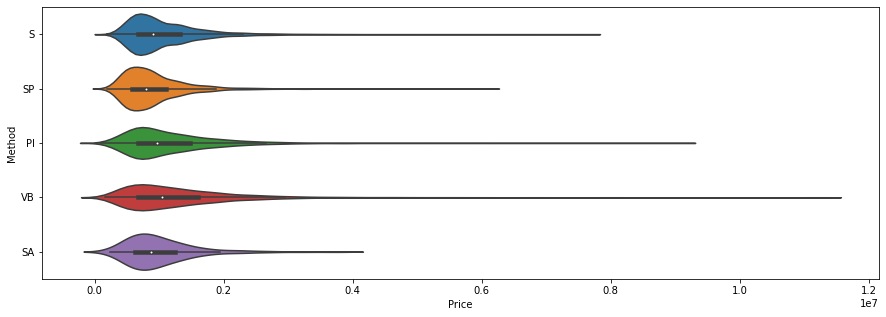

In [32]:
f, ax = plt.subplots(figsize=(15, 5))
sns.violinplot(data = df3, x='Price', y='Method', jitter=.5)
plt.show()

In [33]:
df_copy = pd.merge(df_copy, temp4, on='Method', how='left')
df_copy.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Propertycount,max_sub_id,min_sub_id,mean_sub_id,max_t_id,min_t_id,mean_t_id,max_m_id,min_m_id,mean_m_id
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,4019.0,1876000.0,300000.0,1.072066e+06,11200000.0,131000.0,1.210981e+06,7650000.0,185000.0,1.082119e+06
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,4019.0,1876000.0,300000.0,1.072066e+06,11200000.0,131000.0,1.210981e+06,7650000.0,185000.0,1.082119e+06
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,4019.0,1876000.0,300000.0,1.072066e+06,11200000.0,131000.0,1.210981e+06,6050000.0,190000.0,9.210242e+05
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,4019.0,1876000.0,300000.0,1.072066e+06,11200000.0,131000.0,1.210981e+06,9000000.0,85000.0,1.169908e+06
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,4019.0,1876000.0,300000.0,1.072066e+06,11200000.0,131000.0,1.210981e+06,11200000.0,160000.0,1.257424e+06


In [34]:
sellerg = df3.groupby('SellerG').agg({'min', 'mean', 'max'})
temp5 = sellerg['Price']
temp5 = temp5.reset_index()
temp5.columns = ['SellerG', 'max_s_id', 'min_s_id', 'mean_s_id']
print(temp5.info())
temp5.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SellerG    322 non-null    object 
 1   max_s_id   322 non-null    float64
 2   min_s_id   322 non-null    float64
 3   mean_s_id  322 non-null    float64
dtypes: float64(3), object(1)
memory usage: 10.2+ KB
None


,SellerG,max_s_id,min_s_id,mean_s_id
0,@Realty,1650000.0,499000.0,8.723333e+05
1,ASL,1890000.0,705500.0,1.227100e+06
2,Abercromby's,7650000.0,500000.0,2.065208e+06
3,Ace,600000.0,475000.0,5.516667e+05
4,Alex,1100000.0,1100000.0,1.100000e+06


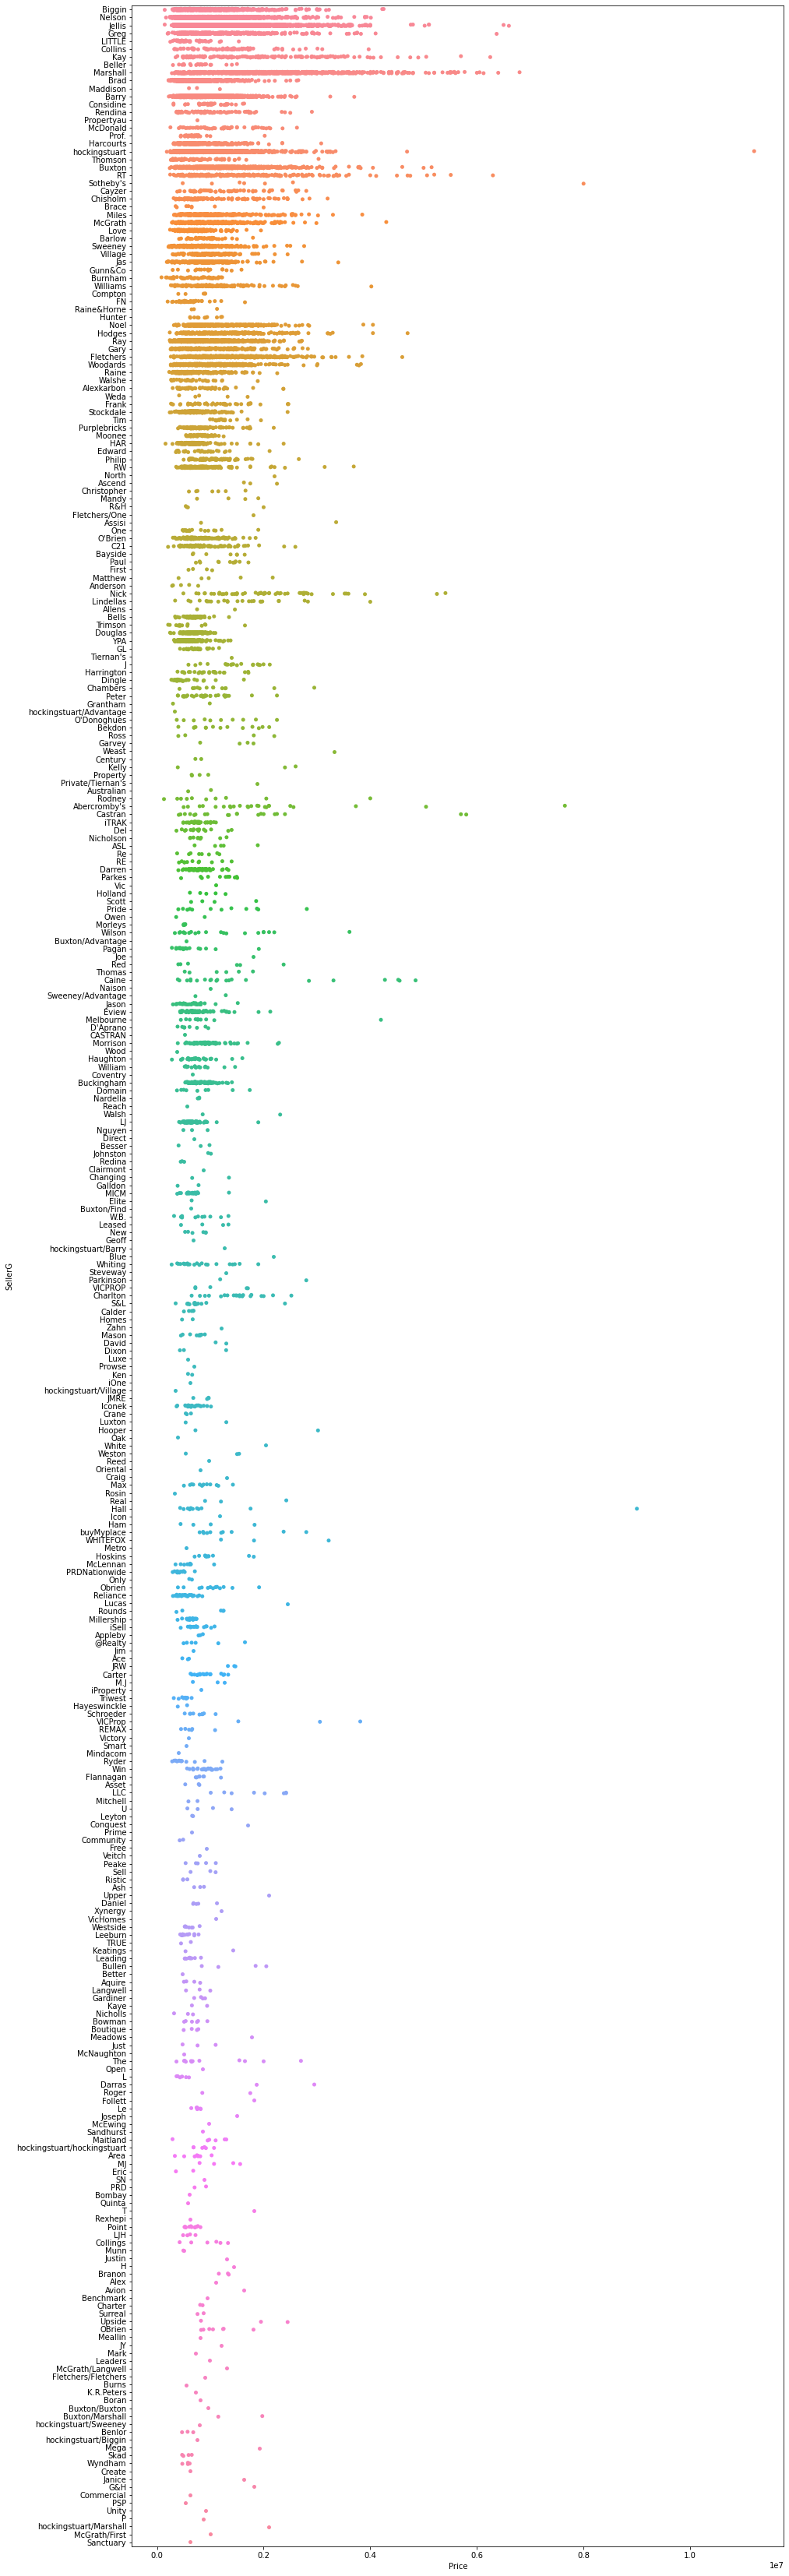

In [35]:
f, ax = plt.subplots(figsize=(15, 60))
sns.stripplot(data = df3, x='Price', y='SellerG', jitter=.1)
plt.show()

In [36]:
df_copy = pd.merge(df_copy, temp5, on='SellerG', how='left')
df_copy.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,mean_sub_id,max_t_id,min_t_id,mean_t_id,max_m_id,min_m_id,mean_m_id,max_s_id,min_s_id,mean_s_id
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.072066e+06,11200000.0,131000.0,1.210981e+06,7650000.0,185000.0,1.082119e+06,4250000.0,145000.0,1.063041e+06
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.072066e+06,11200000.0,131000.0,1.210981e+06,7650000.0,185000.0,1.082119e+06,4250000.0,145000.0,1.063041e+06
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,1.072066e+06,11200000.0,131000.0,1.210981e+06,6050000.0,190000.0,9.210242e+05,4250000.0,145000.0,1.063041e+06
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,1.072066e+06,11200000.0,131000.0,1.210981e+06,9000000.0,85000.0,1.169908e+06,4250000.0,145000.0,1.063041e+06
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.072066e+06,11200000.0,131000.0,1.210981e+06,11200000.0,160000.0,1.257424e+06,4011000.0,170000.0,1.059781e+06


In [37]:
council = df3.groupby('CouncilArea').agg({'min', 'mean', 'max'})
temp6 = council['Price']
temp6 = temp6.reset_index()
temp6.columns = ['CouncilArea', 'max_c_id', 'min_c_id', 'mean_c_id']
print(temp6.info())
temp6.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CouncilArea  33 non-null     object 
 1   max_c_id     33 non-null     float64
 2   min_c_id     33 non-null     float64
 3   mean_c_id    33 non-null     float64
dtypes: float64(3), object(1)
memory usage: 1.2+ KB
None


,CouncilArea,max_c_id,min_c_id,mean_c_id
0,Banyule City Council,3850000.0,325000.0,9.646499e+05
1,Bayside City Council,11200000.0,290000.0,1.670827e+06
2,Boroondara City Council,8000000.0,160000.0,1.758998e+06
3,Brimbank City Council,1750000.0,145000.0,6.979103e+05
4,Cardinia Shire Council,910000.0,410500.0,5.704318e+05


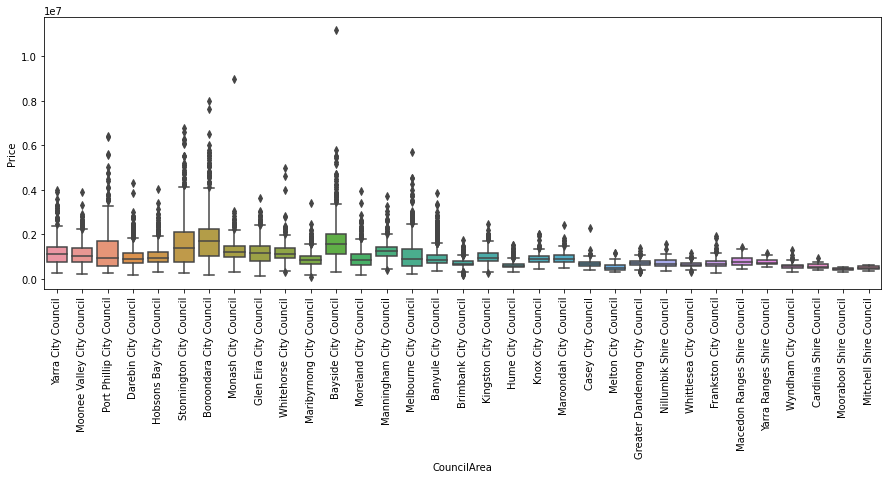

In [38]:
f, ax = plt.subplots(figsize=(15, 5))
sns.boxplot(data = df3, x='CouncilArea', y='Price')
plt.xticks(rotation='vertical')
plt.show()

In [39]:
df_copy = pd.merge(df_copy, temp6, on='CouncilArea', how='left')
df_copy.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,mean_t_id,max_m_id,min_m_id,mean_m_id,max_s_id,min_s_id,mean_s_id,max_c_id,min_c_id,mean_c_id
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.210981e+06,7650000.0,185000.0,1.082119e+06,4250000.0,145000.0,1.063041e+06,4011000.0,270000.0,1.153165e+06
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.210981e+06,7650000.0,185000.0,1.082119e+06,4250000.0,145000.0,1.063041e+06,4011000.0,270000.0,1.153165e+06
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,1.210981e+06,6050000.0,190000.0,9.210242e+05,4250000.0,145000.0,1.063041e+06,4011000.0,270000.0,1.153165e+06
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,1.210981e+06,9000000.0,85000.0,1.169908e+06,4250000.0,145000.0,1.063041e+06,4011000.0,270000.0,1.153165e+06
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.210981e+06,11200000.0,160000.0,1.257424e+06,4011000.0,170000.0,1.059781e+06,4011000.0,270000.0,1.153165e+06


In [40]:
region = df3.groupby('Regionname').agg({'min', 'mean', 'max'})
temp7 = region['Price']
temp7 = temp7.reset_index()
temp7.columns = ['Regionname', 'max_r_id', 'min_r_id', 'mean_r_id']
print(temp7.info())
temp7.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Regionname  8 non-null      object 
 1   max_r_id    8 non-null      float64
 2   min_r_id    8 non-null      float64
 3   mean_r_id   8 non-null      float64
dtypes: float64(3), object(1)
memory usage: 384.0+ bytes
None


,Regionname,max_r_id,min_r_id,mean_r_id
0,Eastern Metropolitan,5000000.0,288000.0,1.135090e+06
1,Eastern Victoria,2300000.0,400000.0,7.179673e+05
2,Northern Metropolitan,4550000.0,145000.0,8.951919e+05
3,Northern Victoria,1430000.0,330000.0,6.184130e+05
4,South-Eastern Metropolitan,9000000.0,266000.0,9.040338e+05


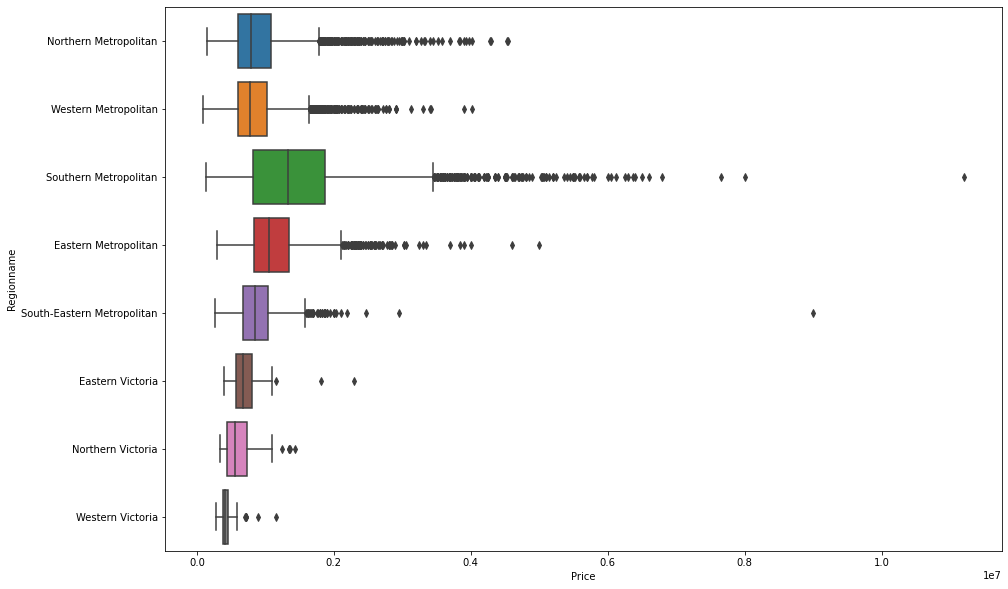

In [41]:
f, ax = plt.subplots(figsize=(15, 10))
sns.boxplot(data = df3, x='Price', y='Regionname')
#plt.xticks(rotation='vertical')
plt.show()

In [42]:
df_copy = pd.merge(df_copy, temp7, on='Regionname', how='left')
df_copy.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,mean_m_id,max_s_id,min_s_id,mean_s_id,max_c_id,min_c_id,mean_c_id,max_r_id,min_r_id,mean_r_id
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.082119e+06,4250000.0,145000.0,1.063041e+06,4011000.0,270000.0,1.153165e+06,4550000.0,145000.0,895191.91931
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.082119e+06,4250000.0,145000.0,1.063041e+06,4011000.0,270000.0,1.153165e+06,4550000.0,145000.0,895191.91931
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,9.210242e+05,4250000.0,145000.0,1.063041e+06,4011000.0,270000.0,1.153165e+06,4550000.0,145000.0,895191.91931
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,1.169908e+06,4250000.0,145000.0,1.063041e+06,4011000.0,270000.0,1.153165e+06,4550000.0,145000.0,895191.91931
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.257424e+06,4011000.0,170000.0,1.059781e+06,4011000.0,270000.0,1.153165e+06,4550000.0,145000.0,895191.91931


In [43]:
df_copy['date_m'], df_copy['date_d'], df_copy['date_y'] = df_copy['Date'].str.split('/', 2).str
df_copy.head()

<ipython-input-43-d18c539883f1>:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  df_copy['date_m'], df_copy['date_d'], df_copy['date_y'] = df_copy['Date'].str.split('/', 2).str


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,mean_s_id,max_c_id,min_c_id,mean_c_id,max_r_id,min_r_id,mean_r_id,date_m,date_d,date_y
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.063041e+06,4011000.0,270000.0,1.153165e+06,4550000.0,145000.0,895191.91931,3,12,2016
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.063041e+06,4011000.0,270000.0,1.153165e+06,4550000.0,145000.0,895191.91931,4,02,2016
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,1.063041e+06,4011000.0,270000.0,1.153165e+06,4550000.0,145000.0,895191.91931,4,03,2017
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,1.063041e+06,4011000.0,270000.0,1.153165e+06,4550000.0,145000.0,895191.91931,4,03,2017
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.059781e+06,4011000.0,270000.0,1.153165e+06,4550000.0,145000.0,895191.91931,4,06,2016


#### Does the "when you sell your home" matter?

In [44]:
df_copy['date_m'] = df_copy['date_m'].astype(int)

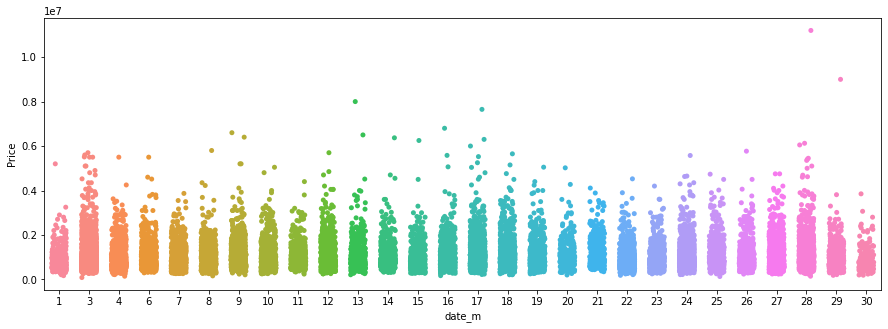

In [45]:
f, ax = plt.subplots(figsize=(15, 5))
sns.stripplot(data = df_copy, x='date_m', y='Price', jitter=.25)
plt.show()

In [46]:
df_copy['date_d'] = df_copy['date_d'].astype(int)

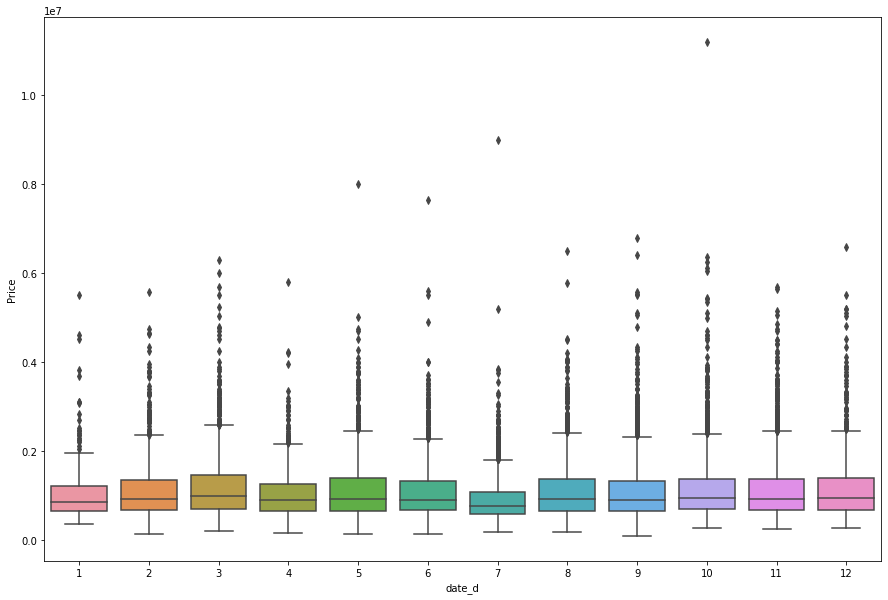

In [47]:
f, ax = plt.subplots(figsize=(15, 10))
sns.boxplot(data = df_copy, x='date_d', y='Price')
plt.show()

In [48]:
df_copy['date_y'] = df_copy['date_y'].astype(int)

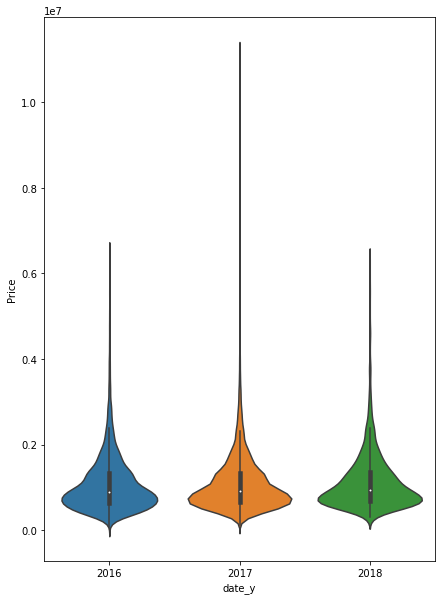

In [49]:
f, ax = plt.subplots(figsize=(7, 10))
sns.violinplot(data = df_copy, x='date_y', y='Price')
plt.show()

#### Lets see how many features we now have:

In [50]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20423 entries, 0 to 20422
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         20423 non-null  object 
 1   Address        20423 non-null  object 
 2   Rooms          20423 non-null  int64  
 3   Type           20423 non-null  object 
 4   Price          20423 non-null  float64
 5   Method         20423 non-null  object 
 6   SellerG        20423 non-null  object 
 7   Date           20423 non-null  object 
 8   Distance       20423 non-null  float64
 9   Postcode       20423 non-null  float64
 10  Bedroom2       20423 non-null  float64
 11  Bathroom       20423 non-null  float64
 12  Car            20423 non-null  float64
 13  CouncilArea    20423 non-null  object 
 14  Regionname     20423 non-null  object 
 15  Propertycount  20423 non-null  float64
 16  max_sub_id     20423 non-null  float64
 17  min_sub_id     20423 non-null  float64
 18  mean_s

In [51]:
df_copy = df_copy.drop(['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea', 'Regionname'], axis=1)
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20423 entries, 0 to 20422
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rooms          20423 non-null  int64  
 1   Price          20423 non-null  float64
 2   Distance       20423 non-null  float64
 3   Postcode       20423 non-null  float64
 4   Bedroom2       20423 non-null  float64
 5   Bathroom       20423 non-null  float64
 6   Car            20423 non-null  float64
 7   Propertycount  20423 non-null  float64
 8   max_sub_id     20423 non-null  float64
 9   min_sub_id     20423 non-null  float64
 10  mean_sub_id    20423 non-null  float64
 11  max_t_id       20423 non-null  float64
 12  min_t_id       20423 non-null  float64
 13  mean_t_id      20423 non-null  float64
 14  max_m_id       20423 non-null  float64
 15  min_m_id       20423 non-null  float64
 16  mean_m_id      20423 non-null  float64
 17  max_s_id       20423 non-null  float64
 18  min_s_

#### Let's see how our new features correlate to the price:

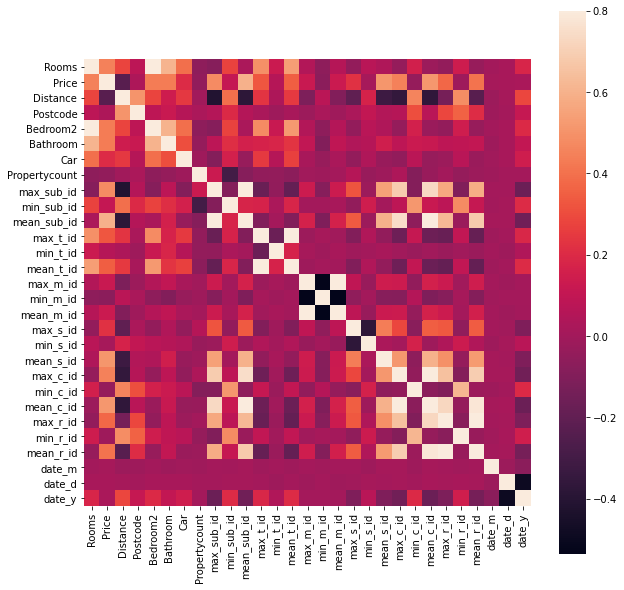

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Propertycount,max_sub_id,min_sub_id,...,mean_s_id,max_c_id,min_c_id,mean_c_id,max_r_id,min_r_id,mean_r_id,date_m,date_d,date_y
Rooms,1.000000,0.447755,0.277932,0.083313,0.958114,0.608362,0.394828,-0.060493,-0.084990,0.273902,...,0.038127,-0.036857,0.156161,-0.017561,-0.042295,0.137694,-0.030724,0.003616,0.017687,0.181344
Price,0.447755,1.000000,-0.233206,0.034483,0.432888,0.432189,0.201803,-0.050635,0.479954,0.105618,...,0.510042,0.449281,-0.036052,0.514383,0.374287,-0.011982,0.407663,0.013454,0.018449,0.024486
Distance,0.277932,-0.233206,1.000000,0.504882,0.281068,0.137296,0.244177,0.000592,-0.411949,0.393196,...,-0.322414,-0.358087,0.457011,-0.367566,-0.131046,0.484229,-0.231767,-0.018275,0.016500,0.286999
Postcode,0.083313,0.034483,0.504882,1.000000,0.086947,0.122364,0.062870,0.031021,0.055362,0.197894,...,0.049062,0.058902,0.306950,0.069446,0.284437,0.357656,0.208873,-0.013893,0.009107,0.114797
Bedroom2,0.958114,0.432888,0.281068,0.086947,1.000000,0.605788,0.396458,-0.060539,-0.086953,0.276163,...,0.038011,-0.040648,0.162791,-0.021338,-0.043854,0.144629,-0.032063,0.003249,0.019681,0.198393
Bathroom,0.608362,0.432189,0.137296,0.122364,0.605788,1.000000,0.305628,-0.040619,0.083134,0.214678,...,0.151294,0.085086,0.127804,0.117359,0.086439,0.090290,0.102292,-0.009463,0.018369,0.104141
Car,0.394828,0.201803,0.244177,0.062870,0.396458,0.305628,1.000000,-0.013955,-0.090076,0.157730,...,-0.025333,-0.051035,0.077779,-0.031524,-0.018011,0.072982,-0.024953,-0.000812,0.017698,0.143054
Propertycount,-0.060493,-0.050635,0.000592,0.031021,-0.060539,-0.040619,-0.013955,1.000000,0.129550,-0.298774,...,-0.009626,0.033421,-0.090953,-0.027481,0.005591,-0.035634,-0.015742,-0.006220,0.007547,0.007536
max_sub_id,-0.084990,0.479954,-0.411949,0.055362,-0.086953,0.083134,-0.090076,0.129550,1.000000,-0.092045,...,0.548513,0.686046,-0.091858,0.733754,0.569259,-0.101935,0.585027,0.007889,0.007321,-0.166975
min_sub_id,0.273902,0.105618,0.393196,0.197894,0.276163,0.214678,0.157730,-0.298774,-0.092045,1.000000,...,0.011379,0.085708,0.514249,0.122477,0.080858,0.478507,0.112736,0.003882,0.013500,0.202450


In [52]:
f, ax = plt.subplots(figsize=(10, 10))
corrmat = df_copy.corr()
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()
corrmat

#### WOW!!! If you look at max sub id, this has a .575 score to price. This is really good, lets see how our new features fare against the same models we used. Let's revisit Decision Tree Regressor.

In [53]:
X = df_copy.drop('Price', axis=1)
Y = df_copy.Price

In [54]:
scores = []
depth = []
for n in range(2, 15):
    dtr = DecisionTreeRegressor(max_features=15, max_depth=n)
    dtr.fit(X, Y)
    scores.append(cross_val_score(dtr, X, Y, cv=12).mean())
    depth.append(n)

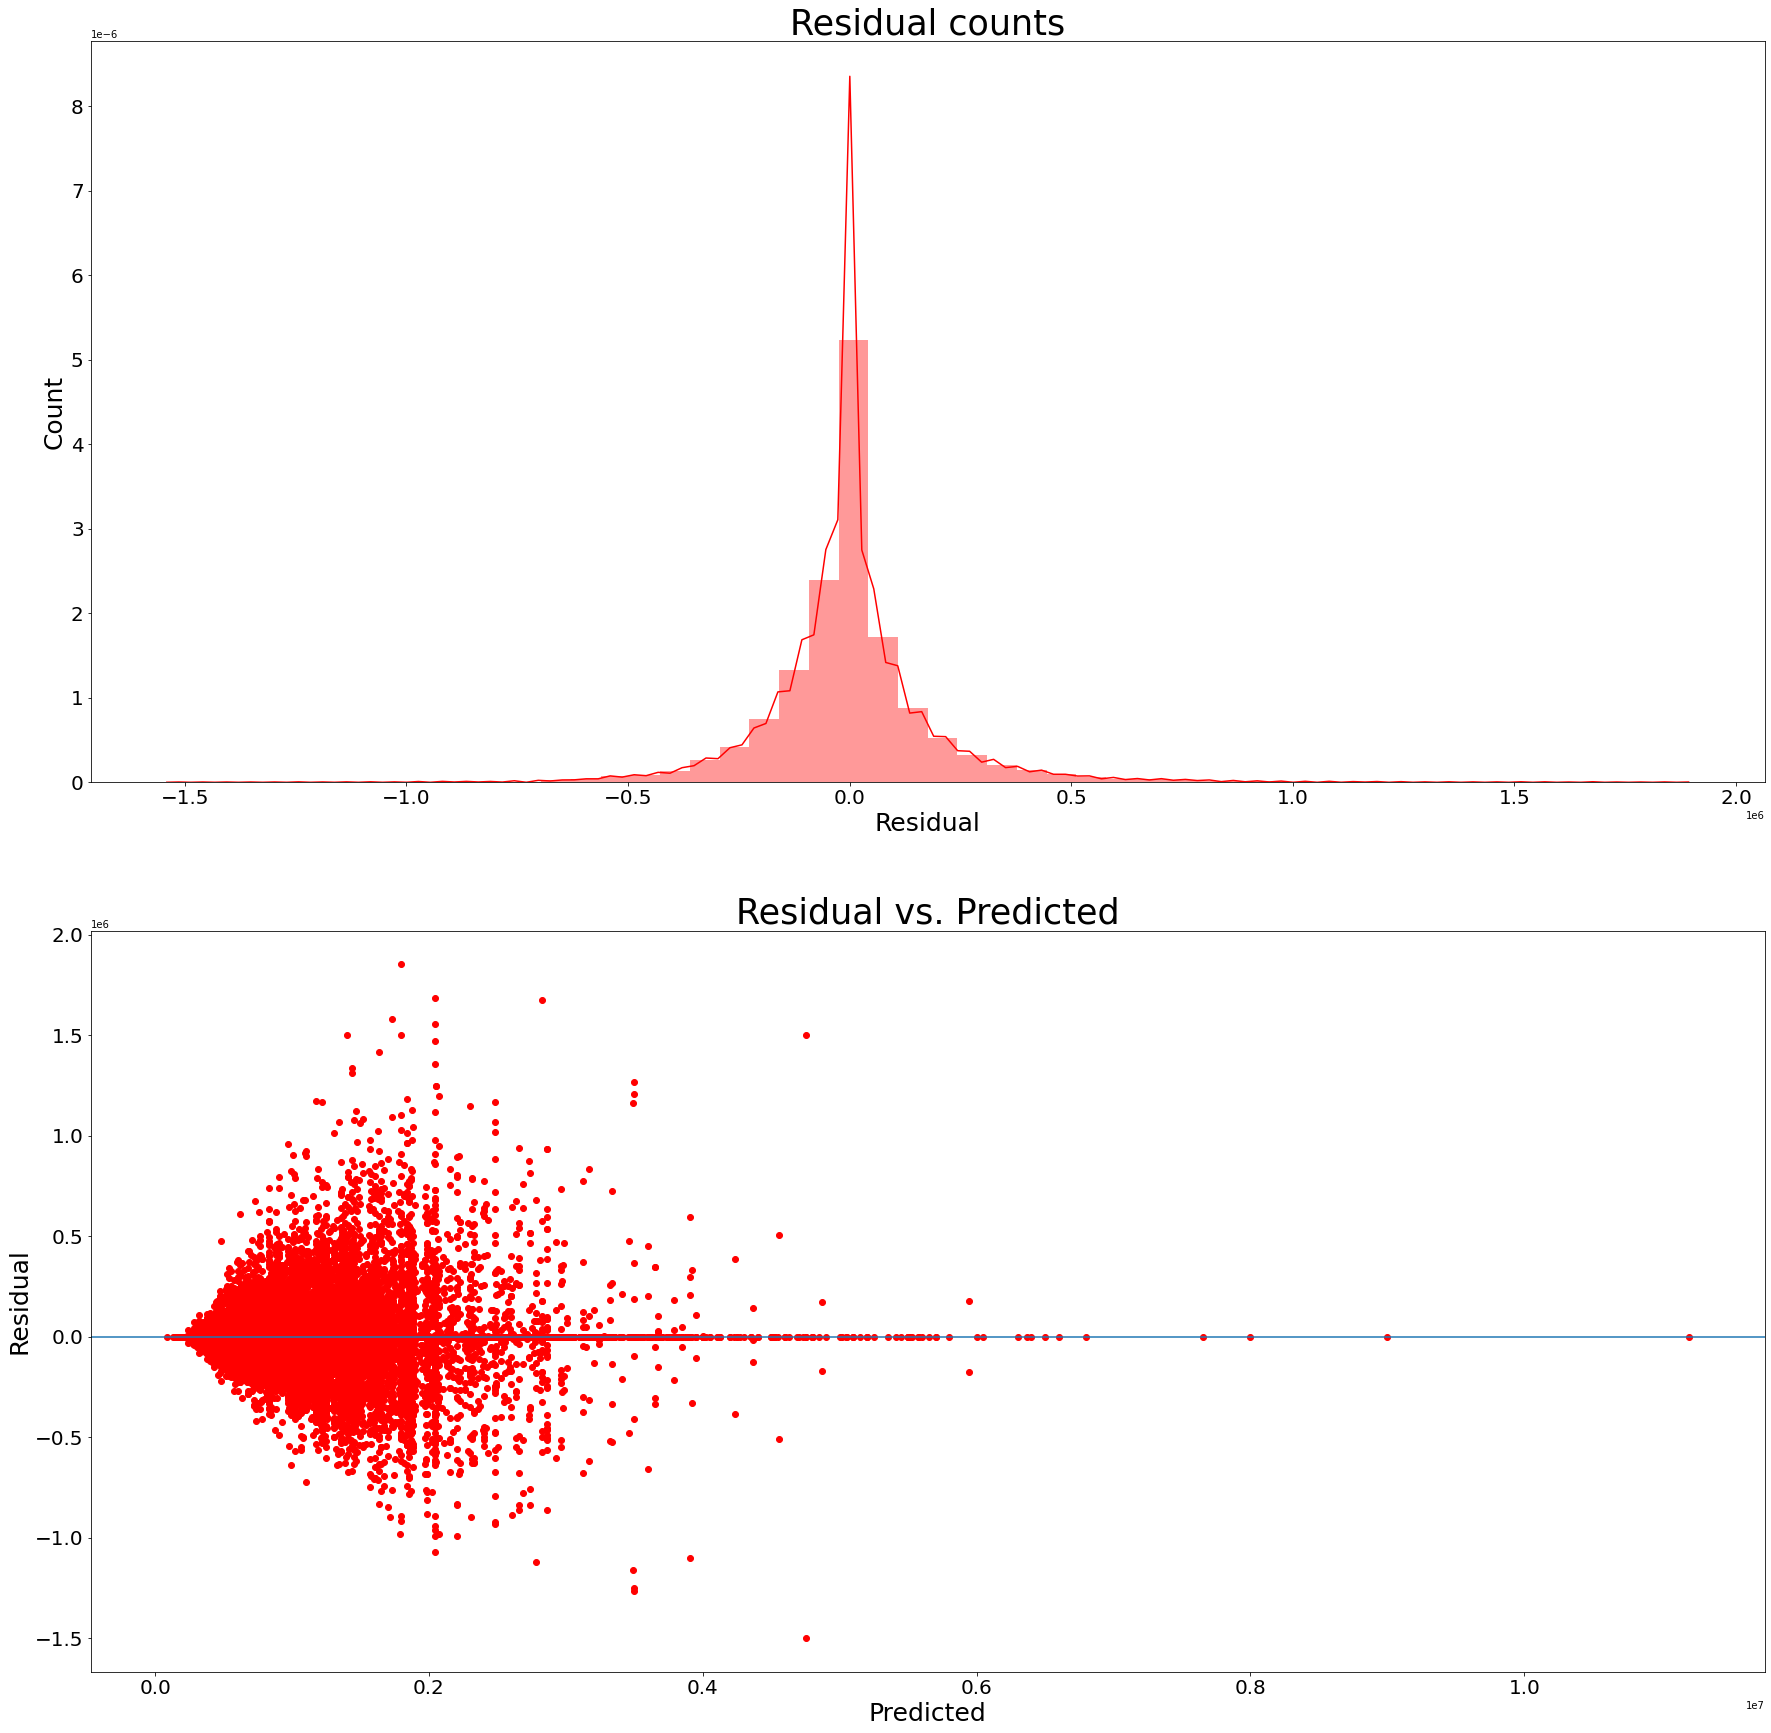

RMSE:
185839.28849416343


In [55]:
predicted = dtr.predict(X)
residual = Y - predicted

fig = plt.figure(figsize=(30,30))
ax1 = plt.subplot(211)
sns.distplot(residual, color ='red')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Residual counts',fontsize=35)
plt.xlabel('Residual',fontsize=25)
plt.ylabel('Count',fontsize=25)

ax2 = plt.subplot(212)
plt.scatter(predicted, residual, color ='red')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('Predicted',fontsize=25)
plt.ylabel('Residual',fontsize=25)
plt.axhline(y=0)
plt.title('Residual vs. Predicted',fontsize=35)

plt.show()

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(Y, predicted))
print('RMSE:')
print(rmse)

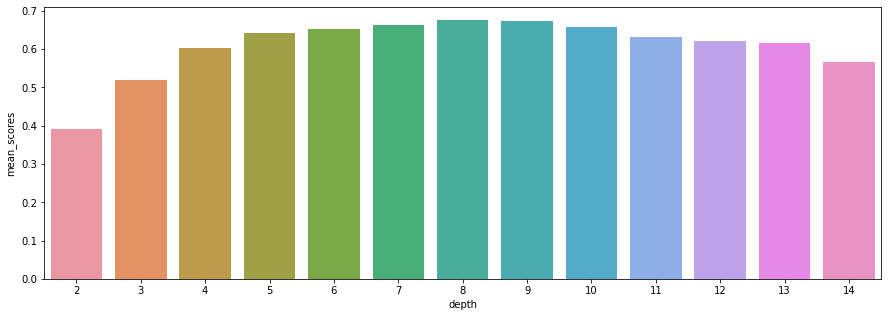

In [56]:
plt_dtr = pd.DataFrame()

plt_dtr['mean_scores'] = scores
plt_dtr['depth'] = depth

f, ax = plt.subplots(figsize=(15, 5))
sns.barplot(data = plt_dtr, x='depth', y='mean_scores')
plt.show()

#### The above bar graph represent number of max depth on the x-axis that the model will limit itself to and on the y-axis is the mean scores of the cross validation of 12 folds. As you can see even the worst mean score of approximately 4, this model guesses way better due to having more information.

#### Let's try "Nearest Neighbors" once more:

In [57]:
knn = neighbors.KNeighborsRegressor(n_neighbors=2)
knn.fit(X, Y)

print(cross_val_score(knn, X, Y, cv=12))

[0.3815417  0.45474589 0.26022924 0.405418   0.4639599  0.4960407
 0.58822636 0.54195737 0.43113149 0.49165639 0.48665233 0.56093099]



R² for the model with many features:
0.8399949624147909


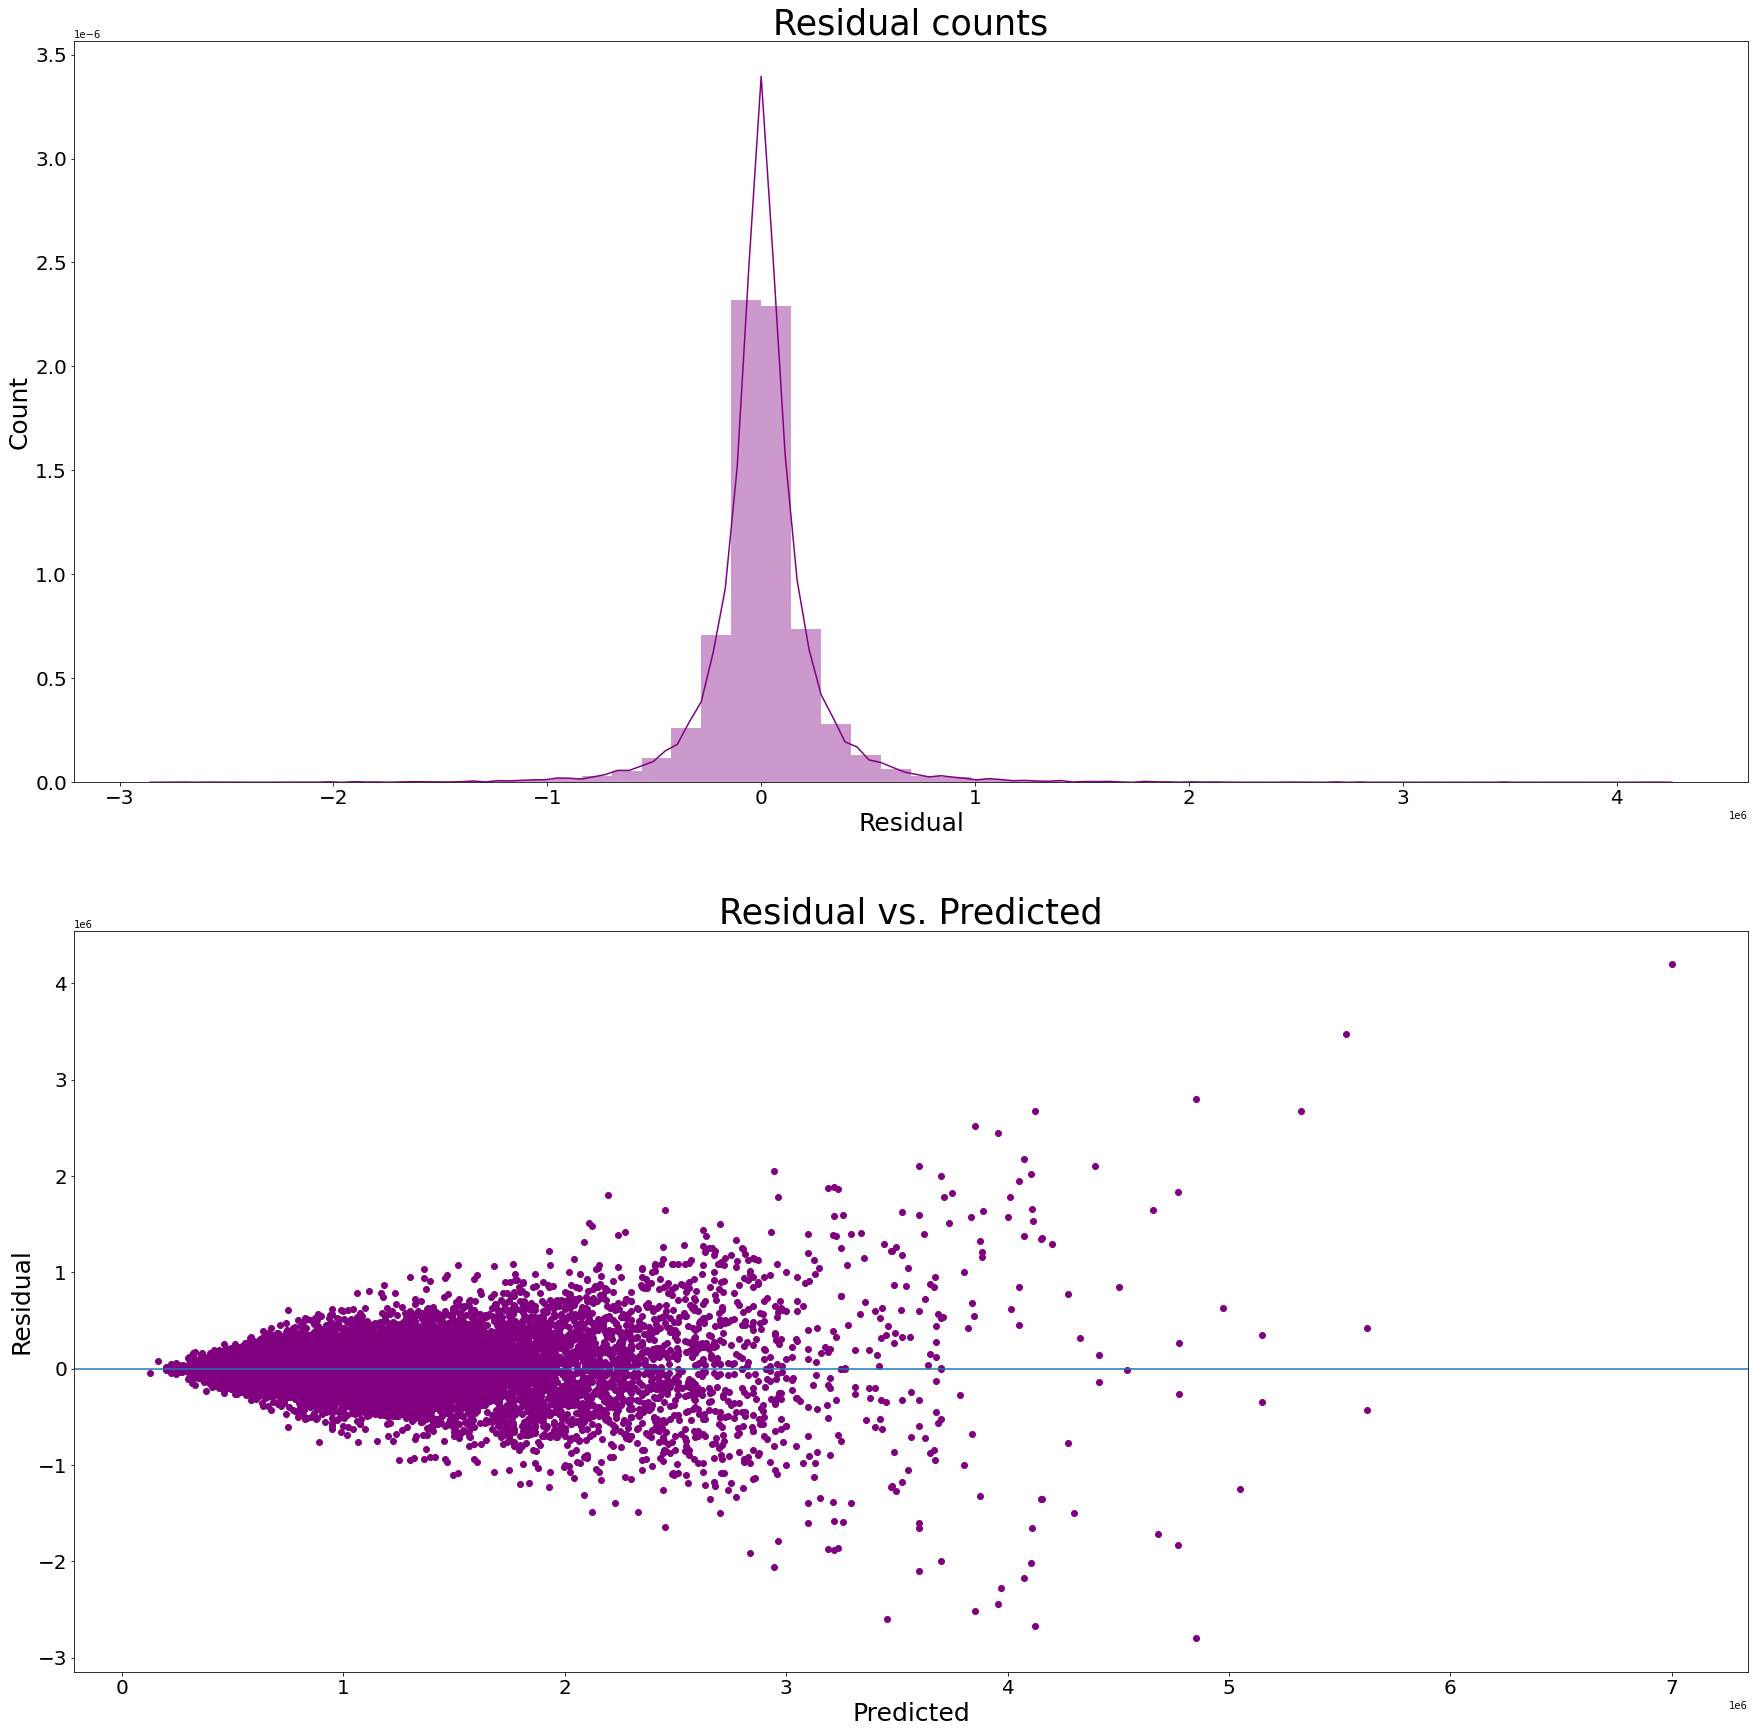

RMSE:
262016.2696138926


In [58]:
knn = neighbors.KNeighborsRegressor(n_neighbors=2)
knn.fit(X, Y)
print('\nR² for the model with many features:')
print(knn.score(X, Y))
predicted = knn.predict(X)
residual = Y - predicted

fig = plt.figure(figsize=(30,30))
ax1 = plt.subplot(211)
sns.distplot(residual, color ='purple')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Residual counts',fontsize=35)
plt.xlabel('Residual',fontsize=25)
plt.ylabel('Count',fontsize=25)

ax2 = plt.subplot(212)
plt.scatter(predicted, residual, color ='purple')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('Predicted',fontsize=25)
plt.ylabel('Residual',fontsize=25)
plt.axhline(y=0)
plt.title('Residual vs. Predicted',fontsize=35)

plt.show()

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(Y, predicted))
print('RMSE:')
print(rmse)

#### It appears that the RMSE is higher this time around, but I believe this is due to higher priced homes does not follow the normal pricing pattern. It seems that $2,000,000 would be the threshold for home prices.

#### Lets give "Lasso & Ridge" another shot:

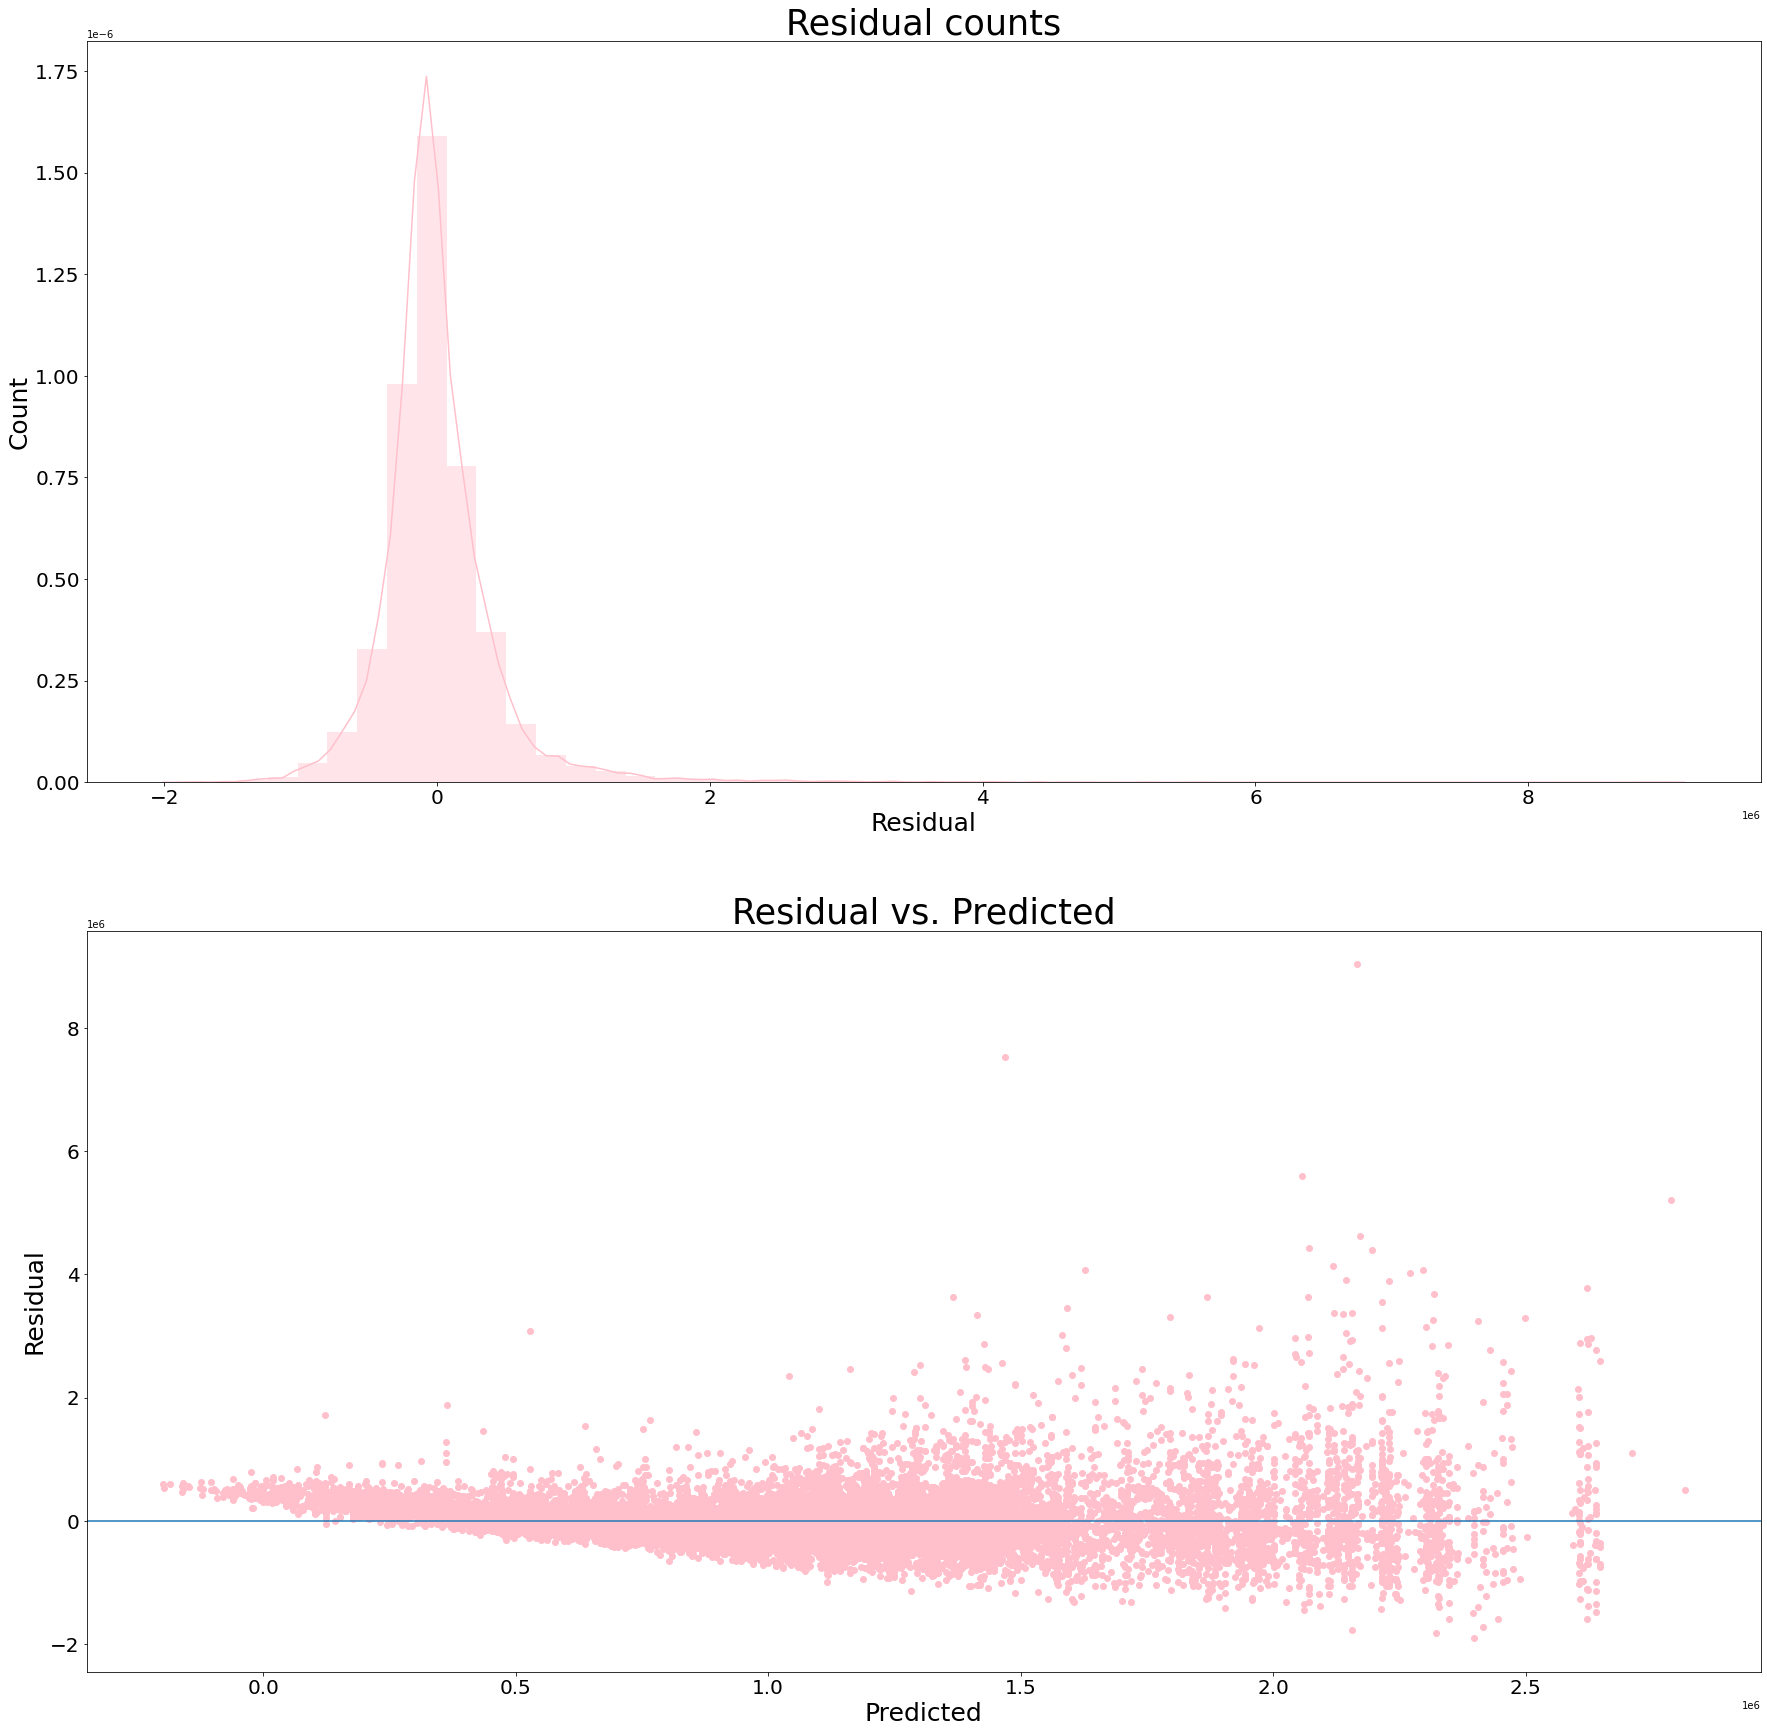

RMSE:
433333.5380919701


In [59]:
lass = linear_model.Lasso(alpha = 1.15e8)
lass.fit (X, Y)

predicted = lass.predict(X)
residual = Y - predicted

fig = plt.figure(figsize=(30,30))
ax1 = plt.subplot(211)
sns.distplot(residual, color ='pink')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Residual counts',fontsize=35)
plt.xlabel('Residual',fontsize=25)
plt.ylabel('Count',fontsize=25)

ax2 = plt.subplot(212)
plt.scatter(predicted, residual, color ='pink')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('Predicted',fontsize=25)
plt.ylabel('Residual',fontsize=25)
plt.axhline(y=0)
plt.title('Residual vs. Predicted',fontsize=35)

plt.show()

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(Y, predicted))
print('RMSE:')
print(rmse)

In [60]:
lass = linear_model.Lasso(alpha = 1.15e8)
lass.fit (X, Y)

print('\nR²:')
print(lass.score(X, Y))
origparams = np.append(lass.coef_, lass.intercept_)
print('\nParameter features:')
print(origparams)

print('\nCross Validation Score:')
print(cross_val_score(lass, X, Y, cv=12))


R²:
0.5623552295020628

Parameter features:
[ 0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  2.25668120e-02
 -2.02712019e-01  6.97368858e-01  1.11236891e-02  0.00000000e+00
  1.08057828e+00  2.01397020e-03  0.00000000e+00  5.66918892e-02
 -3.48983274e-03 -0.00000000e+00  4.04425144e-01  3.79434400e-03
 -9.54327649e-02  3.45942749e-02 -9.09575436e-04 -0.00000000e+00
  1.12566471e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -1.59081571e+06]

Cross Validation Score:
[0.47784003 0.54381458 0.47295459 0.49657363 0.54294026 0.55552073
 0.6014649  0.55211674 0.58218073 0.5443701  0.61425337 0.6115934 ]


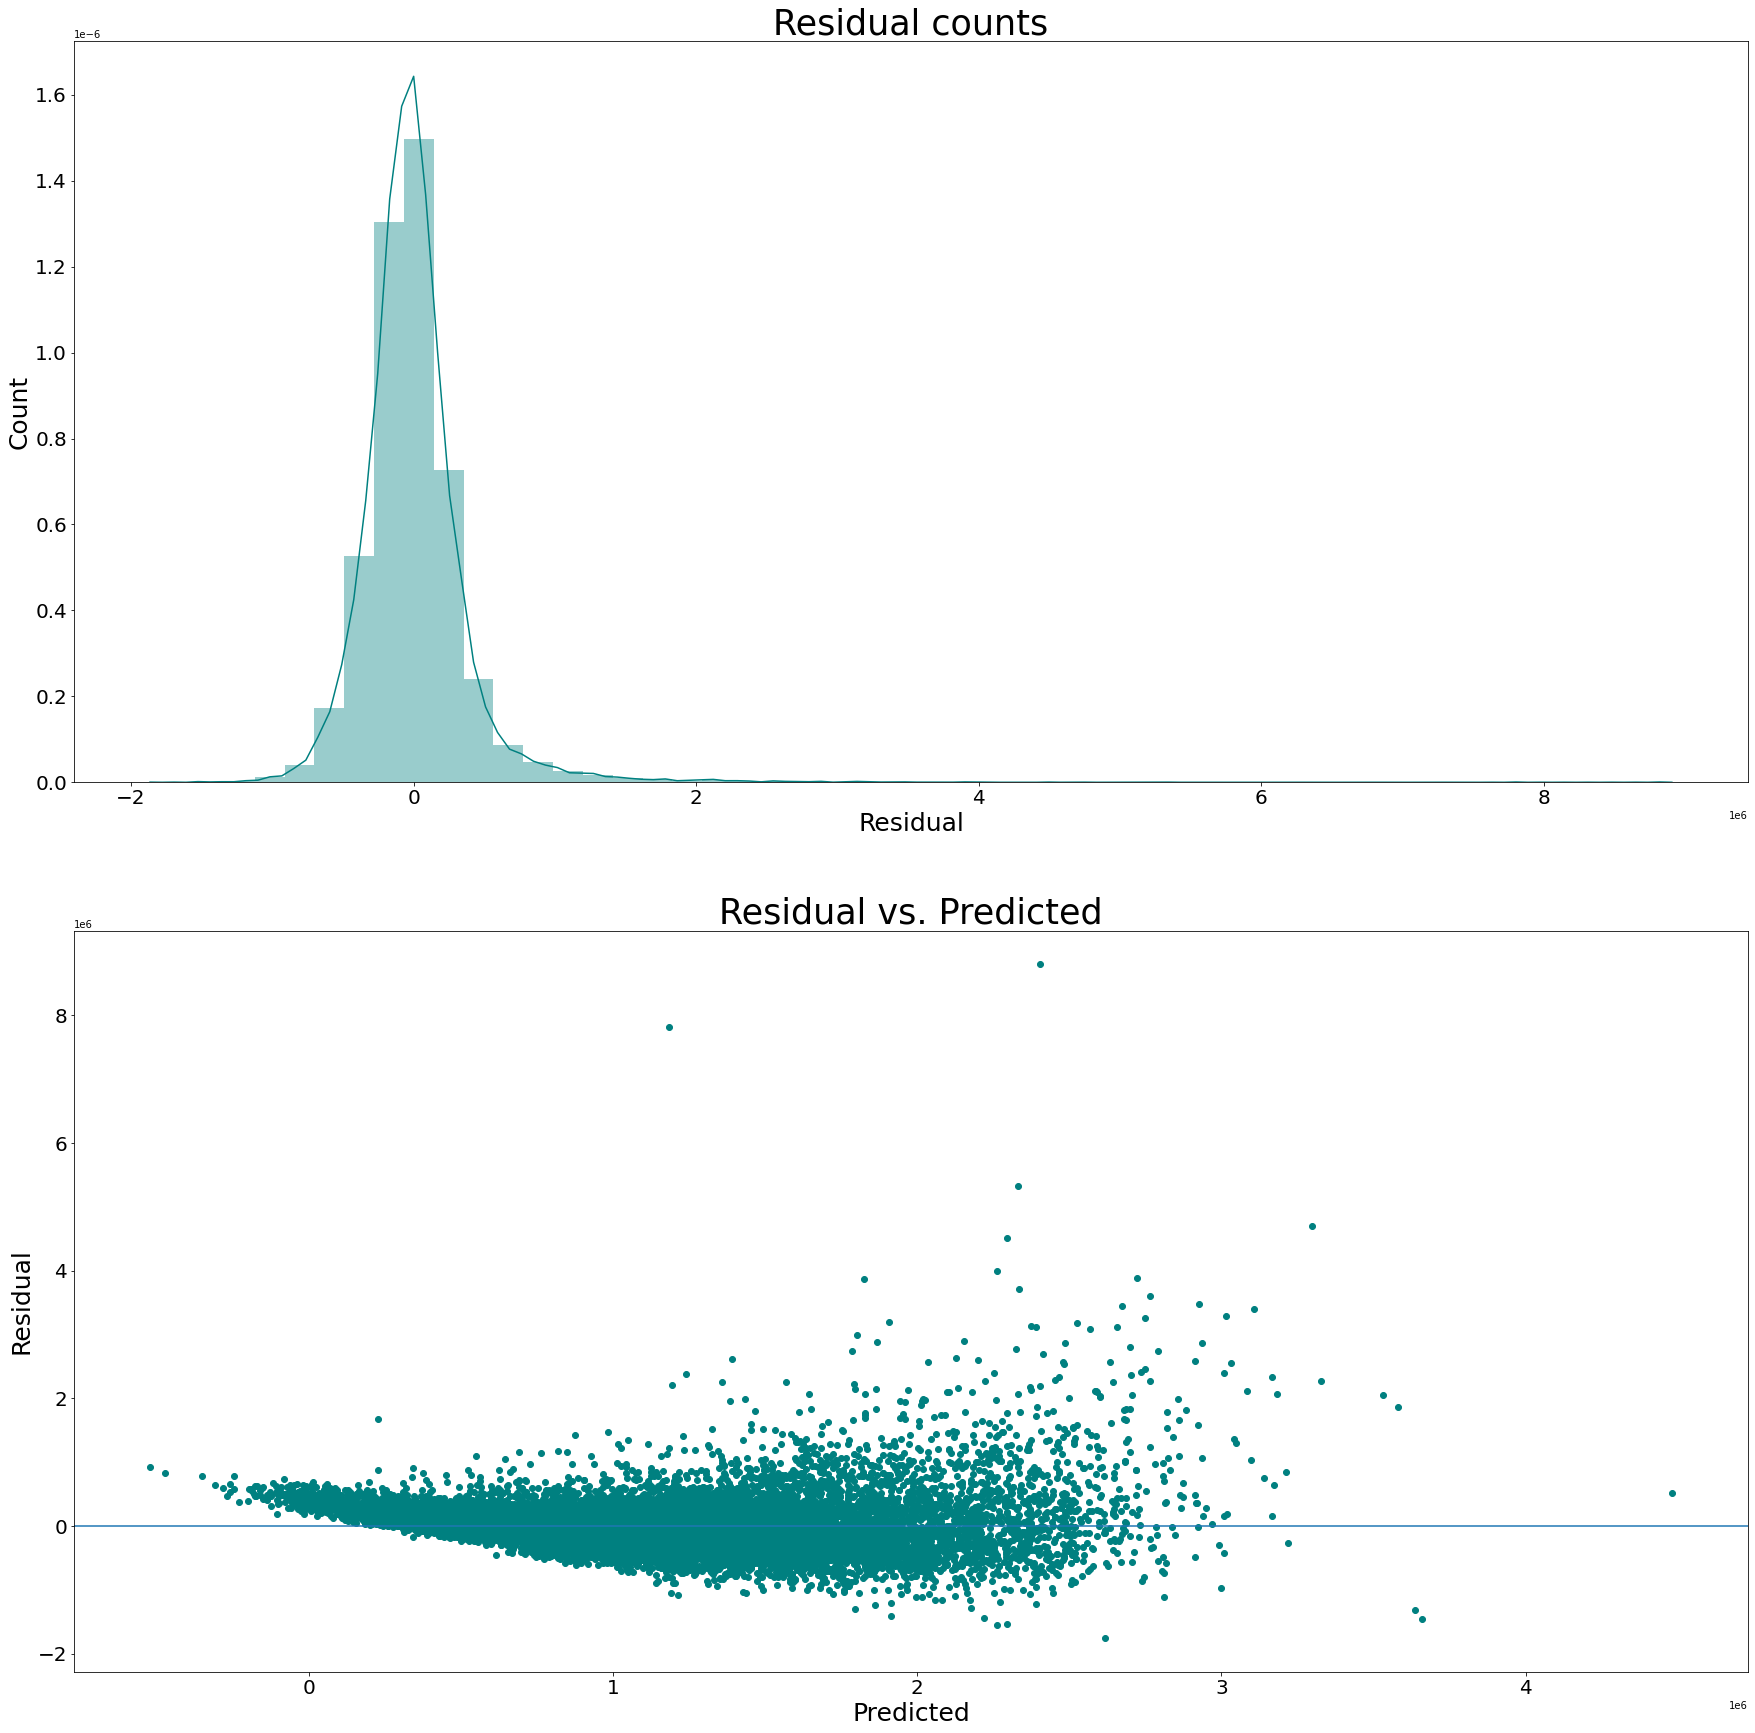

RMSE:
374780.93551909813


In [61]:
rid = linear_model.Ridge(alpha = 90)
rid.fit (X, Y)

predicted = rid.predict(X)
residual = Y - predicted

fig = plt.figure(figsize=(30,30))
ax1 = plt.subplot(211)
sns.distplot(residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Residual counts',fontsize=35)
plt.xlabel('Residual',fontsize=25)
plt.ylabel('Count',fontsize=25)

ax2 = plt.subplot(212)
plt.scatter(predicted, residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('Predicted',fontsize=25)
plt.ylabel('Residual',fontsize=25)
plt.axhline(y=0)
plt.title('Residual vs. Predicted',fontsize=35)

plt.show()

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(Y, predicted))
print('RMSE:')
print(rmse)

In [62]:
rid = linear_model.Ridge(alpha = 90)
rid.fit (X, Y)

print('\nR²:')
print(rid.score(X, Y))
origparams_rid = np.append(rid.coef_, rid.intercept_)
print('\nParameter features:')
print(origparams_rid)

print('\nCross Validation Score:')
print(cross_val_score(rid, X, Y, cv=12))


R²:
0.6726350946886532

Parameter features:
[ 1.49887951e+05 -2.25772673e+04  1.84211704e+02  1.00307096e+04
  1.47065913e+05  3.95414550e+04 -1.96711874e+00  1.70146751e-02
 -3.97457316e-01  5.94848085e-01  4.04351940e-03 -4.96597181e-01
  7.79986592e-01 -2.75276350e-02  6.21845821e-01  4.07264883e-01
 -2.10226328e-03  2.63242369e-02  2.96422625e-01  3.74588413e-03
  9.17009341e-03  4.38058277e-04  2.74349412e-02  6.05840786e-01
 -1.56453720e-01  7.89164965e+02  8.75852103e+03  8.02452755e+04
 -1.64067045e+08]

Cross Validation Score:


C:\Users\61424\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.79821e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\61424\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.19513e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\61424\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.46826e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


[0.6652379  0.68404853 0.64156804 0.61713007 0.67067026 0.66885985
 0.67078917 0.6148682  0.65954248 0.64399119 0.69837717 0.70538379]


C:\Users\61424\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.85062e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


#### Ridge is the winner: Although the RMSE score is high look at the cross validation score, it ranges between 60-70%. This is really good. Lets take a look at the coefficients and see dollar to dollar what each feature is valued at.

In [63]:
cdf = pd.DataFrame(data = rid.coef_, index = X.columns, columns = ['Coefficients'])
cdf

,Coefficients
Rooms,149887.951393
Distance,-22577.267350
Postcode,184.211704
Bedroom2,10030.709606
Bathroom,147065.912619
Car,39541.454982
Propertycount,-1.967119
max_sub_id,0.017015
min_sub_id,-0.397457
mean_sub_id,0.594848


#### Boosting

In [64]:
from sklearn.ensemble import GradientBoostingRegressor

r_sq = []
deep = []
mean_scores = []

#loss : {‘ls’, ‘lad’, ‘huber’, ‘quantile’}
for n in range(3, 11):
    gbr = GradientBoostingRegressor(loss ='ls', max_depth=n)
    gbr.fit (X, Y)
    deep.append(n)
    r_sq.append(gbr.score(X, Y))
    mean_scores.append(cross_val_score(gbr, X, Y, cv=12).mean())

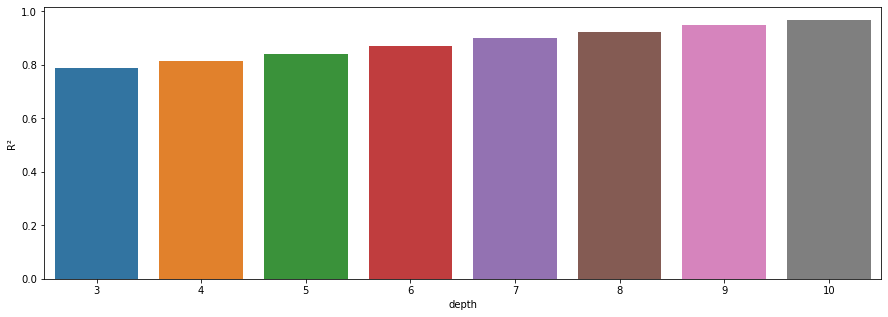

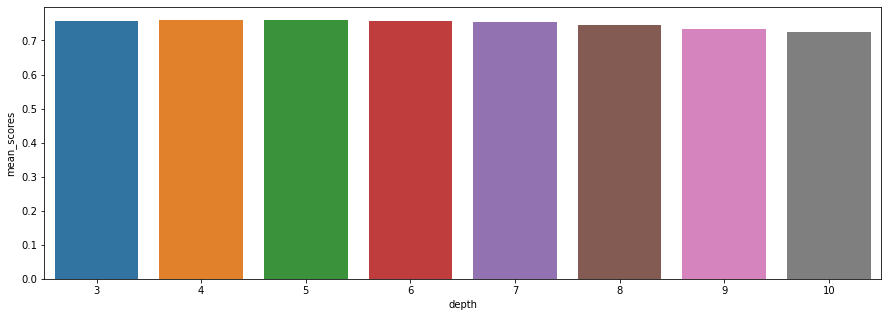

In [65]:
plt_gbr = pd.DataFrame()

plt_gbr['mean_scores'] = mean_scores
plt_gbr['depth'] = deep
plt_gbr['R²'] = r_sq

f, ax = plt.subplots(figsize=(15, 5))
sns.barplot(data = plt_gbr, x='depth', y='R²')
plt.show()

f, ax = plt.subplots(figsize=(15, 5))
sns.barplot(data = plt_gbr, x='depth', y='mean_scores')
plt.show()

In [66]:
gbr = GradientBoostingRegressor(loss ='ls', max_depth=6)
gbr.fit (X, Y)
predicted = gbr.predict(X)
rmse = np.sqrt(mean_squared_error(Y, predicted))
scores = cross_val_score(gbr, X, Y, cv=12)

print('\nCross Validation Scores:')
print(scores)
print('\nMean Score:')
print(scores.mean())
print('\nRMSE:')
print(rmse)


Cross Validation Scores:
[0.73968684 0.77765912 0.7363348  0.72563832 0.76748452 0.78112792
 0.81204419 0.71113116 0.75095176 0.73095003 0.77608772 0.78468346]

Mean Score:
0.7578149866621434

RMSE:
236283.12987625625


#### Boosting is as advertised!!! It reduced the bias and variances. This is evidenced by a higher mean score and a much lower RMSE than the ridge model.

In [67]:
cdf = pd.DataFrame(data = gbr.feature_importances_, index = X.columns, columns = ['Importance'])
cdf

,Importance
Rooms,0.097841
Distance,0.033188
Postcode,0.008408
Bedroom2,0.033212
Bathroom,0.070963
Car,0.018020
Propertycount,0.005320
max_sub_id,0.073328
min_sub_id,0.009666
mean_sub_id,0.362754


#### Deployment using Flask for Random Forest Regressor

In [68]:
df=df_copy.dropna(axis=0)

In [69]:
y=df["Price"]

In [70]:
melbourne_features=['Rooms','Bathroom','Distance','Car']

In [71]:
x=df[melbourne_features]

In [78]:
from sklearn.ensemble import RandomForestRegressor
rt_model=RandomForestRegressor(n_estimators=100,random_state=0)
rt_model.fit(x,y)
random_forest_accuracy=evaluate(rt_model,x,y)

Model Performance
Average Error: 221236.0271 degrees.
Accuracy = 78.46%.


In [73]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)
{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [74]:

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x, y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   58.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 11.3min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [75]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 10,
 'bootstrap': True}

In [76]:

def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [77]:

best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, x, y)

basemodel_accuracy=evaluate(rt_model,x,y)

print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - basemodel_accuracy) / basemodel_accuracy))

Model Performance
Average Error: 266632.7774 degrees.
Accuracy = 74.02%.
Model Performance
Average Error: 221236.0271 degrees.
Accuracy = 78.46%.
Improvement of -5.65%.


In [79]:
from joblib import dump,load
dump(rf_random,'housepriceprediction.joblib')

['housepriceprediction.joblib']